Integrating chapter 5.8, the Bayesian Network, into your storytelling can provide an interesting perspective on understanding the impact of different features on the target class. The idea of comparing the causal effect of features obtained from the Bayesian Network with the features identified by the other ML algorithms in chapters 5.1 to 5.7 is a compelling approach. Here's an introduction text for chapter 5.8 that aligns with this idea:

# Chapter 5.8: Unveiling the True Causal Feature

In our quest to unravel the intricate relationship between various features and the presence of chronic kidney disease (CKD), we embark on a fascinating journey through the realm of Bayesian Networks. While the previous chapters (5.1 to 5.7) introduced us to various machine learning algorithms, each providing valuable insights into feature importance, we now delve deeper into the domain of causal inference.

The Bayesian Network, an elegant framework for modeling probabilistic relationships, allows us to explore the causal dependencies between our features and the target class (CKD or notCKD). Unlike the other algorithms that identify associations or correlations, the Bayesian Network empowers us to uncover true causal relationships.

To ascertain the feature with the most significant causal effect on the target class, we devise an iterative process that harnesses the power of the law of large numbers. By repeatedly analyzing the Bayesian Network over 100 iterations, we can leverage the cumulative knowledge gained to unveil the feature of true causality.

In this chapter, we embrace the richness of the Bayesian Network and compare the outcomes with the feature importance identified by the other ML algorithms in chapters 5.1 to 5.7. By drawing comparisons and evaluating the performance of these models against the "true causal feature" determined by our iterative exploration, we aim to gain deeper insights into the factors that influence the occurrence of chronic kidney disease.

In [2]:
import numpy as np
import pandas as pd
# !pip install bnlearn
import bnlearn as bn
import pandas as pd


class BN:
    
    def __init__(self):
        self.model: dict
        self.classes_ = None
        self.dag = None
        self.df = pd.DataFrame()
        self.feature_names = []
    
    def set_feature_names(self, feature_names):
        self.feature_names = feature_names
    
    def fit(self, X_train, y_train):
        y_train_reshaped = y_train.reshape(-1, 1)

        # Concatenate X_train and y_train
        combined_matrix = np.concatenate((X_train, y_train_reshaped), axis=1)
        # Combine X and y into a single dataframe
        self.df = pd.DataFrame(combined_matrix, columns=[
            *self.feature_names, 'class'])
    
        self.dag = bn.structure_learning.fit(self.df, verbose=1)
        self.model = bn.parameter_learning.fit(self.dag, self.df, verbose=1)
        self.model = bn.independence_test(self.model, self.df, alpha=0.05, verbose=1)
        # print('nodes', self.model['model'].nodes())
        
        
    def predict(self, X_test):
        predictions = []
        
        for i, row in enumerate(X_test):
            evidence = {}
            for j, feature in enumerate(self.feature_names):
                if feature in self.model['model'].nodes():
                    evidence[feature] = row[j]
            # print('evidence', evidence)
            try:
                fit = bn.inference.fit(self.model, variables=['class'], evidence=evidence, verbose=1)
            except:
                class MyClass:
                    def __init__(self, df):
                        self.df = df
                fit = MyClass({'p': [0, 0]})
            # print(fit.df)
            
            predictions.append(fit.df['p'][1] > 0.5)
        return predictions

-------------------------------------------------------------
Iteration: 1
-------------------------------------------------------------
learning with mean imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2/5
learning curve could not be created
Cross-validation iteration 3/5
learning curve could not be created
Cross-validation iteration 4/5
learning curve could not be created
Cross-validation iteration 5/5
learning curve could not be created
learning with median imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2/5
learning curve could not be created
Cross-validation iteration 3/5
learning curve could not be created
Cross-validation iteration 4/5
learning curve could not be created
Cross-validation iteration 5/5
learning curve could not be created
learning with mode imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2

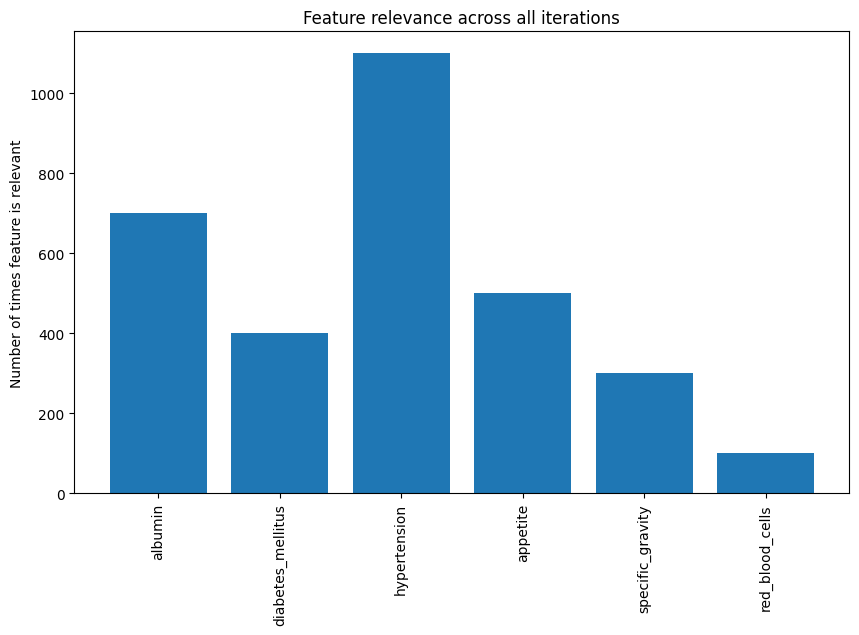

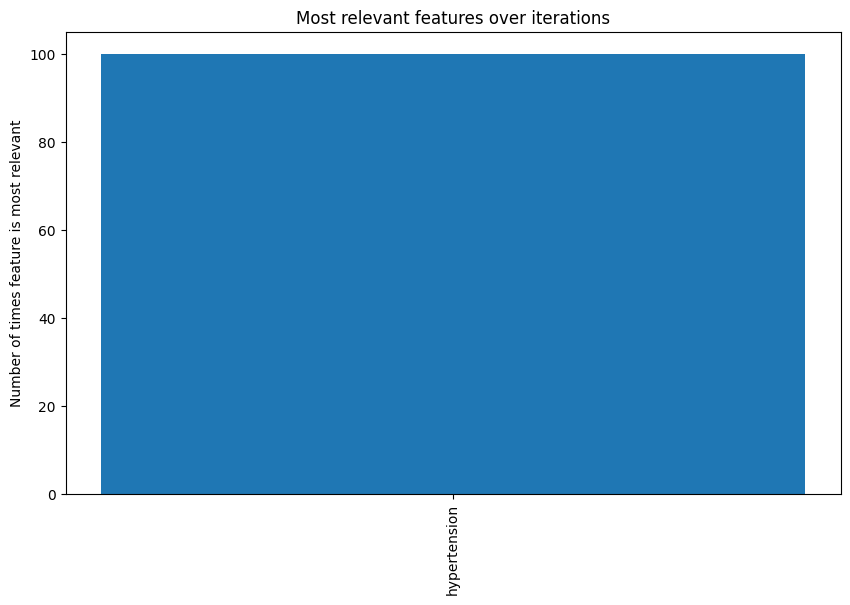

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util.functions import impute_and_train

df_numeric =  pd.read_csv('processed/df_numeric.csv')

sources_frequency = {} # dictionary to save the number of times each feature appears
max_frequency = {} # dictionary to save the feature with the highest frequency per iteration
iterations = 100

for i in range(iterations):
    print("-------------------------------------------------------------")
    print("Iteration: " + str(i + 1))
    print("-------------------------------------------------------------")
    results = impute_and_train(df_numeric, BN)
    sources = []
    for _, models in results['models'].items():
        for model in models:
            mod = model.model
            independence_df = mod['independence_test']
            inf_on_class = independence_df[['source', 'target', 'p_value']].where(independence_df['target'] == 'class').dropna().sort_values(by='p_value')
            for _, row in inf_on_class.iterrows():
                source = row['source']
                sources.append(source)
                if source not in sources_frequency:
                    sources_frequency[source] = 1
                else:
                    sources_frequency[source] += 1
                    
    # find the source with the highest frequency in this iteration
    unique_sources, counts = np.unique(sources, return_counts=True)
    max_source = unique_sources[np.argmax(counts)]
    if max_source not in max_frequency:
        max_frequency[max_source] = 1
    else:
        max_frequency[max_source] += 1

# plot sources and number of times they appear
plt.figure(figsize=(10, 6))
plt.bar(sources_frequency.keys(), sources_frequency.values())
plt.xticks(rotation=90)
plt.ylabel('Number of times feature is relevant')
plt.title('Feature relevance across all iterations')
plt.show()

# plot sources with the highest frequency and number of times they appear
plt.figure(figsize=(10, 6))
plt.bar(max_frequency.keys(), max_frequency.values())
plt.xticks(rotation=90)
plt.ylabel('Number of times feature is most relevant')
plt.title('Most relevant features over iterations')
plt.show()

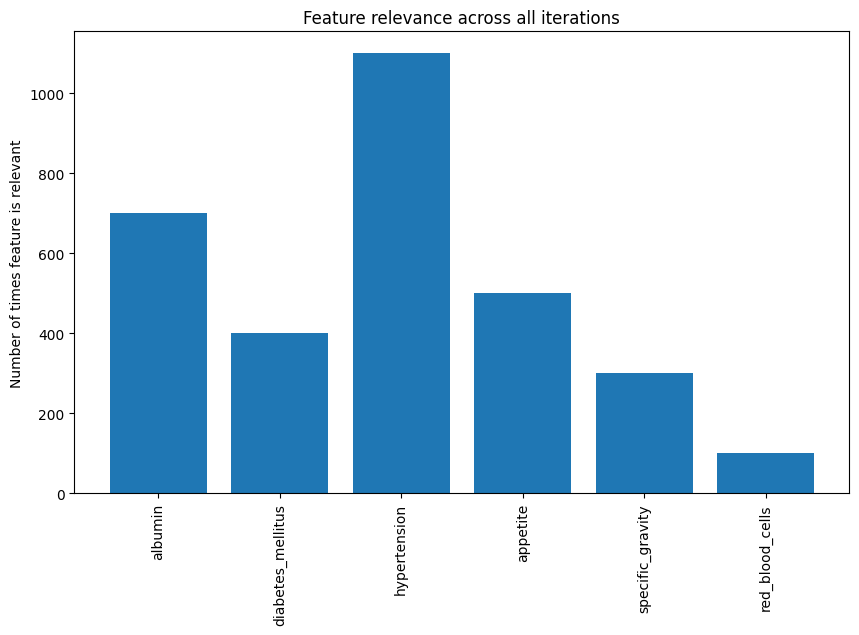

In [8]:
# plot sources and number of times they appear
plt.figure(figsize=(10, 6))
plt.bar(sources_frequency.keys(), sources_frequency.values())
plt.xticks(rotation=90)
plt.ylabel('Number of times feature is relevant')
plt.title('Feature relevance across all iterations')
plt.show()

In [6]:
print(sources_frequency) 

{'albumin': 700, 'diabetes_mellitus': 400, 'hypertension': 1100, 'appetite': 500, 'specific_gravity': 300, 'red_blood_cells': 100}


In [7]:
print(max_frequency)

{'hypertension': 100}


-------------------------------------------------------------
Iteration: 1
-------------------------------------------------------------
learning with mean imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2/5
learning curve could not be created
Cross-validation iteration 3/5
learning curve could not be created
Cross-validation iteration 4/5
learning curve could not be created
Cross-validation iteration 5/5
learning curve could not be created
learning with median imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2/5
learning curve could not be created
Cross-validation iteration 3/5
learning curve could not be created
Cross-validation iteration 4/5
learning curve could not be created
Cross-validation iteration 5/5
learning curve could not be created
learning with mode imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2

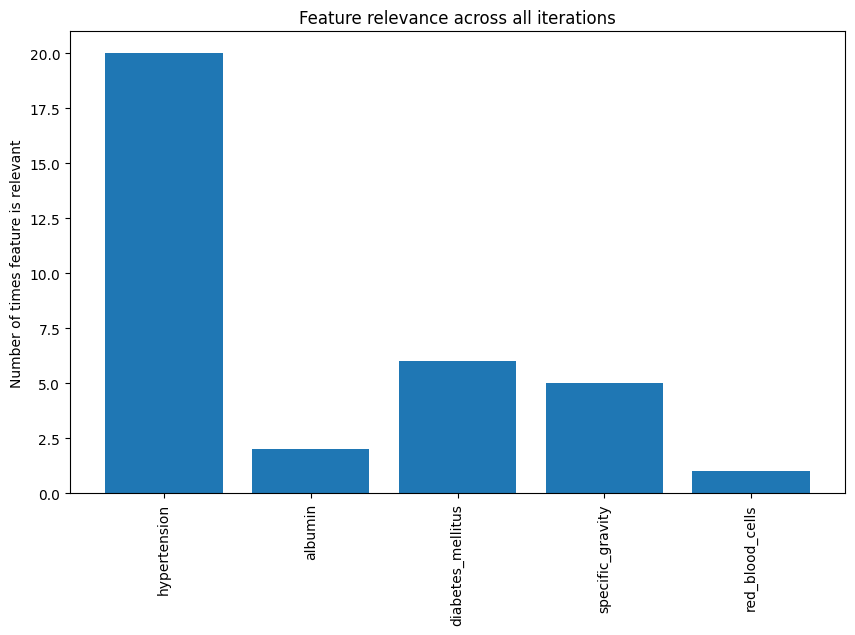

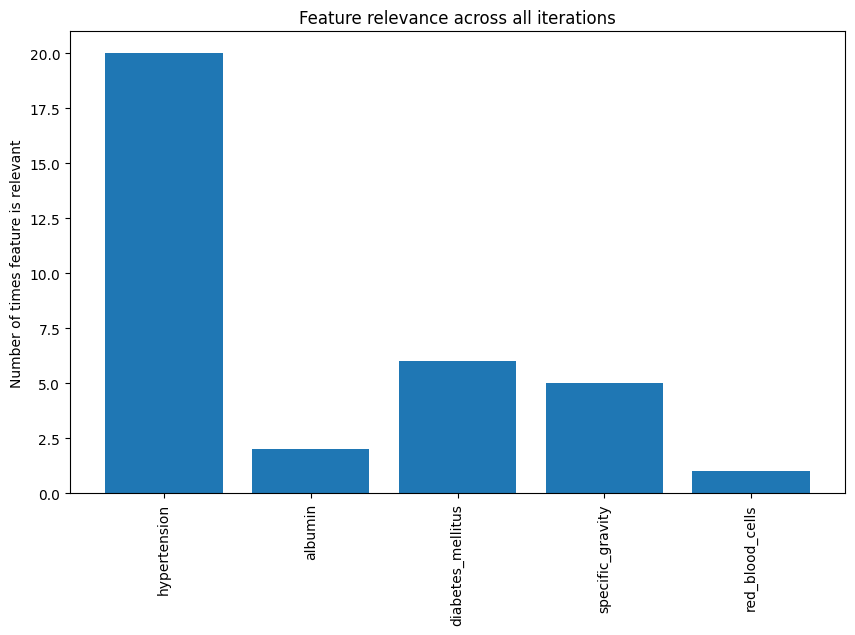

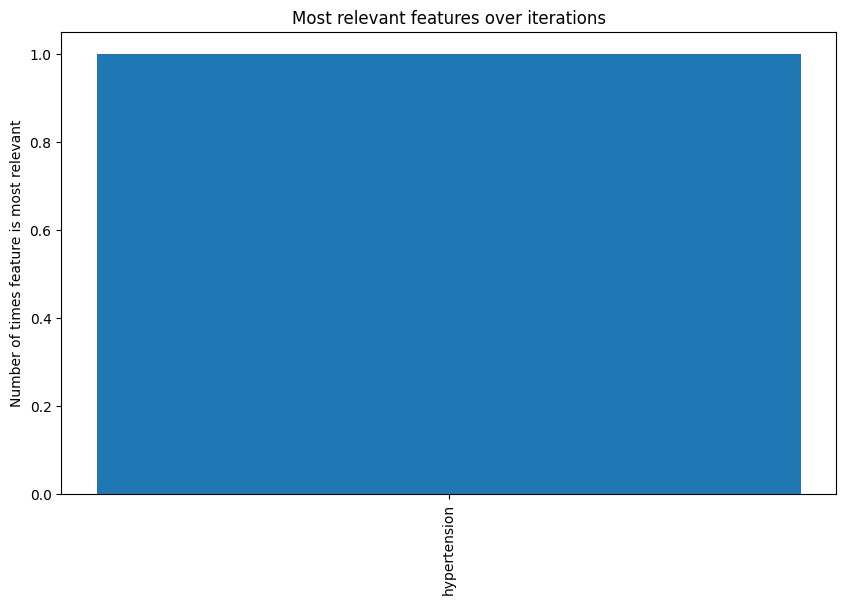

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util.functions import impute_and_train


df_numeric =  pd.read_csv('processed/df_numeric.csv')


sources_frequency = {} # dictionary to save the number of times each feature appears
max_frequency_per_iter = []  # list to save the feature with the highest frequency per iteration
iterations = 1


for i in range(iterations):
    print("-------------------------------------------------------------")
    print("Iteration: " + str(i + 1))
    print("-------------------------------------------------------------")
    # shuffle dataframe before each iteration
    df_numeric = df_numeric.sample(frac=1).reset_index(drop=True)
    results = impute_and_train(df_numeric, BN)
    sources = []
    for _, models in results['models'].items():
        for model in models:
            mod = model.model
            independence_df = mod['independence_test']
            inf_on_class = independence_df[['source', 'target', 'p_value']].where(independence_df['target'] == 'class').dropna().sort_values(by='p_value')
            for _, row in inf_on_class.iterrows():
                source = row['source']
                sources.append(source)
                if source not in sources_frequency:
                    sources_frequency[source] = 1
                else:
                    sources_frequency[source] += 1
                    
    # find the source with the highest frequency in this iteration
    unique_sources, counts = np.unique(sources, return_counts=True)
    max_source = unique_sources[np.argmax(counts)]
    max_frequency_per_iter.append(max_source)
    # plot sources and number of times they appear
    plt.figure(figsize=(10, 6))
    plt.bar(sources_frequency.keys(), sources_frequency.values())
    plt.xticks(rotation=90)
    plt.ylabel('Number of times feature is relevant')
    plt.title('Feature relevance across all iterations')
    plt.show()

# get frequencies of most frequent feature per iteration
max_frequency = pd.Series(max_frequency_per_iter).value_counts().to_dict()

# plot sources and number of times they appear
plt.figure(figsize=(10, 6))
plt.bar(sources_frequency.keys(), sources_frequency.values())
plt.xticks(rotation=90)
plt.ylabel('Number of times feature is relevant')
plt.title('Feature relevance across all iterations')
plt.show()

# plot sources with the highest frequency and number of times they appear
plt.figure(figsize=(10, 6))
plt.bar(max_frequency.keys(), max_frequency.values())
plt.xticks(rotation=90)
plt.ylabel('Number of times feature is most relevant')
plt.title('Most relevant features over iterations')
plt.show()


In [10]:
print(max_frequency_per_iter)

['hypertension', 'hypertension', 'hypertension']


In [2]:
from util.functions import impute_and_train

df_numeric =  pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_numeric, BN)

learning with mean imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2/5
learning curve could not be created
Cross-validation iteration 3/5
learning curve could not be created
Cross-validation iteration 4/5
learning curve could not be created
Cross-validation iteration 5/5
learning curve could not be created
learning with median imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2/5
learning curve could not be created
Cross-validation iteration 3/5
learning curve could not be created
Cross-validation iteration 4/5
learning curve could not be created
Cross-validation iteration 5/5
learning curve could not be created
learning with mode imputed data
Cross-validation iteration 1/5
learning curve could not be created
Cross-validation iteration 2/5
learning curve could not be created
Cross-validation iteration 3/5
learning curve could not be created
Cross-validation iteration 4/5


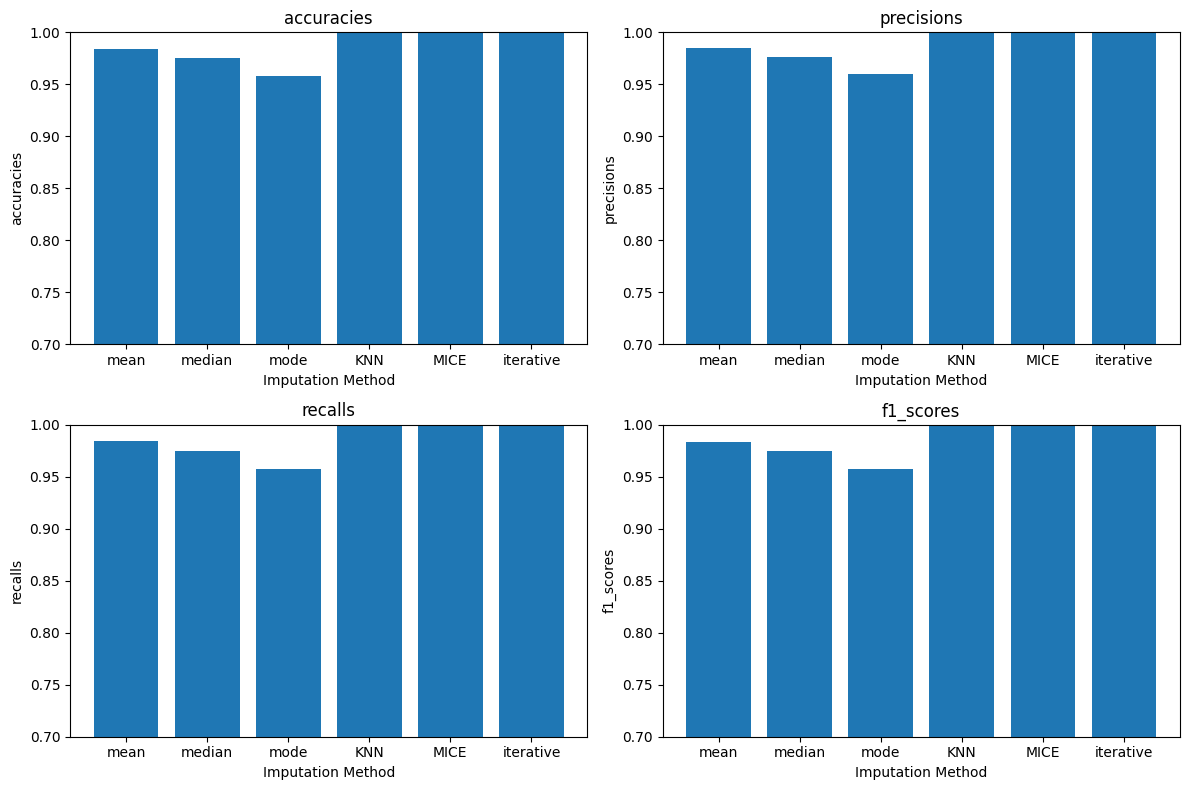

In [3]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


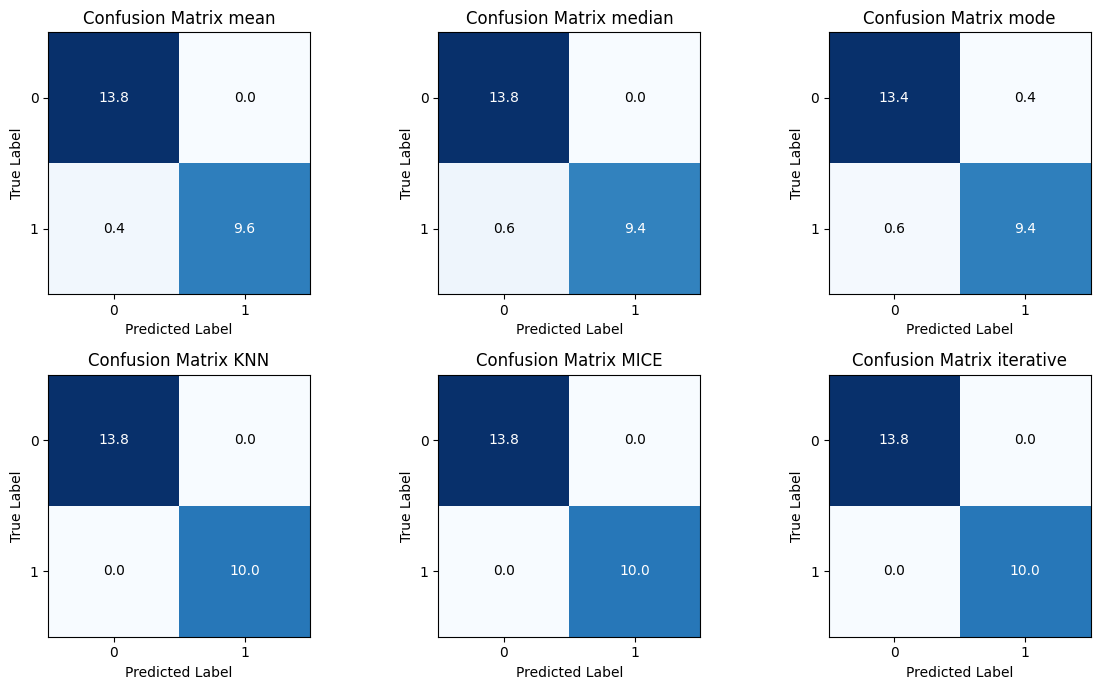

In [4]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

mean 1
               source                   target       p_value
6               class         specific_gravity  3.705588e-32
1             albumin                    class  2.106899e-26
8               class       packed_cell_volume  1.459562e-22
16  diabetes_mellitus             hypertension  2.481870e-22
9               class             hypertension  2.480524e-19
10              class        diabetes_mellitus  1.537545e-18
0             albumin                 pus_cell  2.114199e-17
3            pus_cell          pus_cell_clumps  4.151374e-17
17        pedal_edema                 appetite  1.579535e-11
15  diabetes_mellitus                    sugar  2.709541e-09
11              class                 appetite  6.043591e-09
12              class              pedal_edema  7.524790e-08
5               class           blood_pressure  7.630447e-08
2            pus_cell          red_blood_cells  1.689371e-07
4            pus_cell                 bacteria  3.088132e-07
13              c

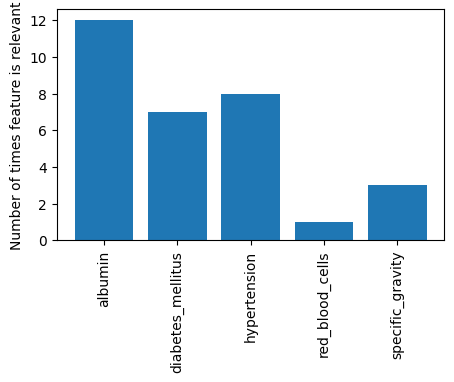

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

sources = []
for i, (name, models) in enumerate(results['models'].items()):
    for j, model in enumerate(models):
        print(name, j+1)
        mod = model.model
        independence_df = mod['independence_test']
        inf_on_class = independence_df[['source', 'target', 'p_value']].where(independence_df['target'] == 'class').dropna().sort_values(by='p_value')
        for index, row in inf_on_class.iterrows():
            sources.append(row['source'])
            
        all_inf = independence_df[['source', 'target', 'p_value']].dropna().sort_values(by='p_value')
        print(all_inf)
            
# plot soures and number of times they appear
plt.figure(figsize=(5, 3))
plt.bar(*np.unique(sources, return_counts=True))
plt.xticks(rotation=90)
plt.ylabel('Number of times feature is relevant')
plt.show()

mean 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


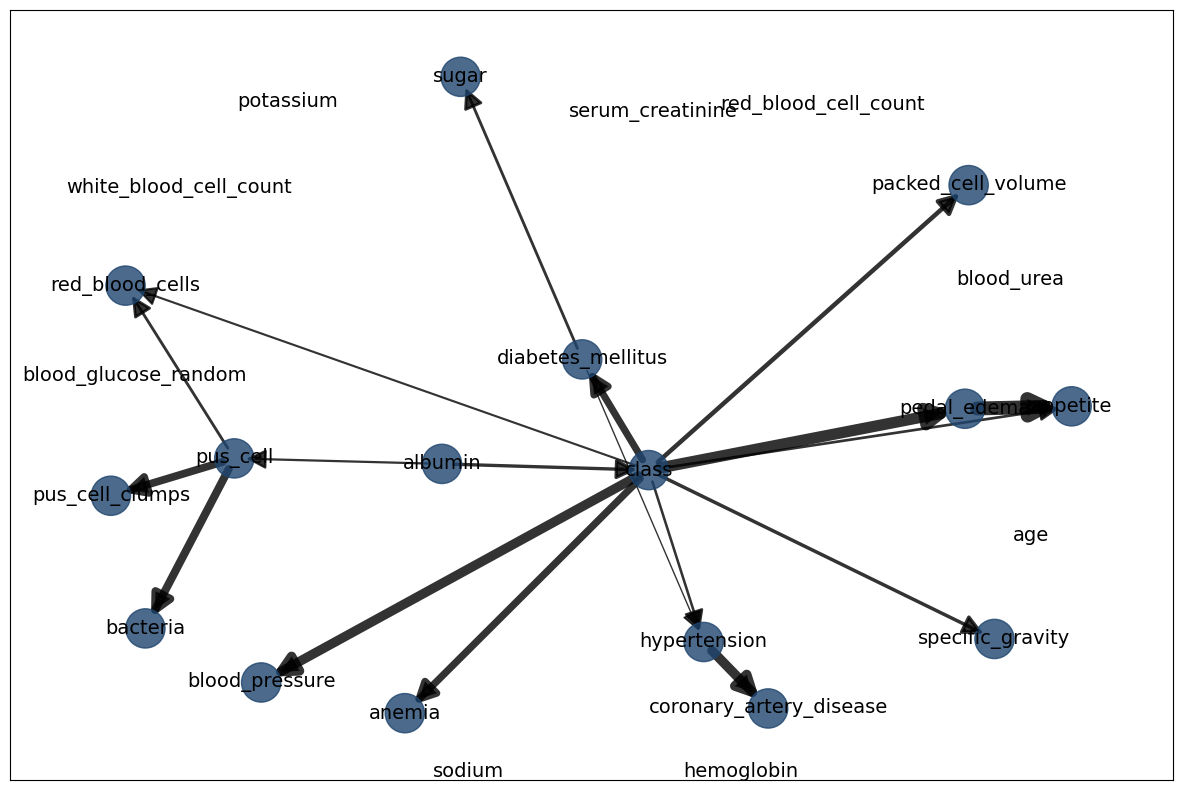

mean 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


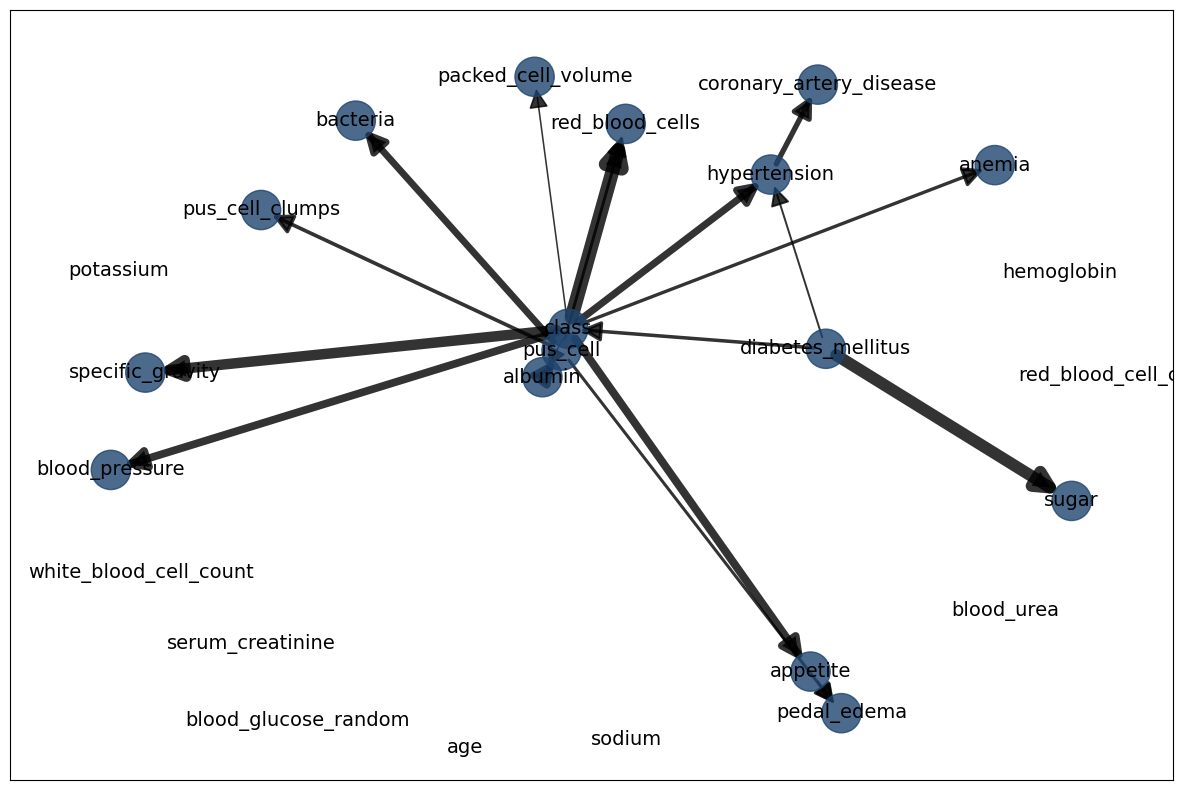

mean 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


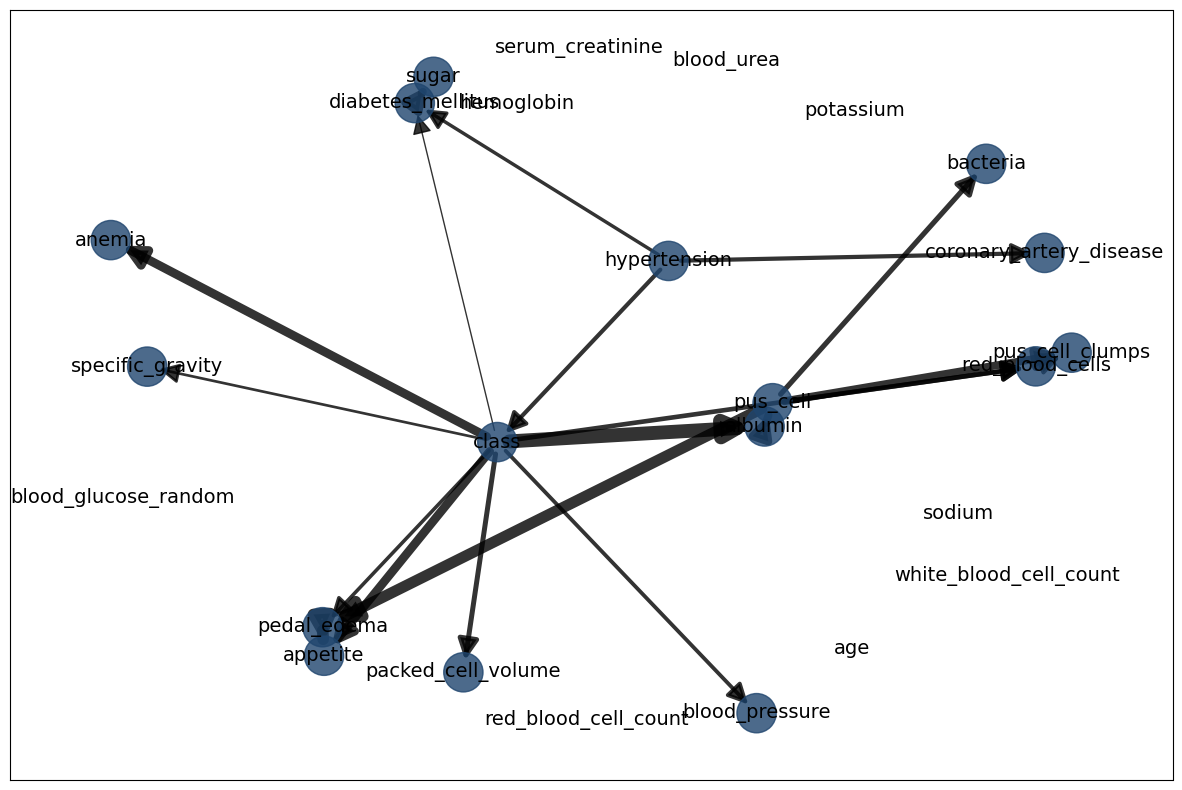

mean 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


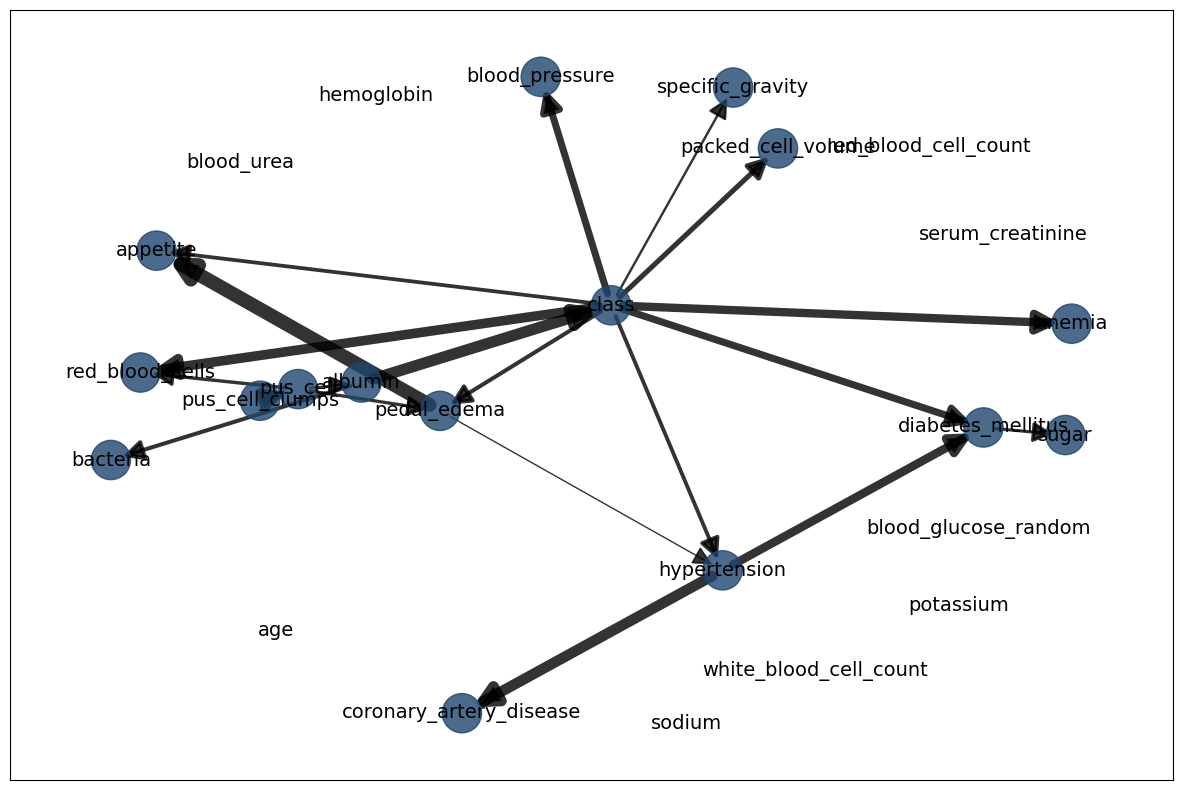

mean 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


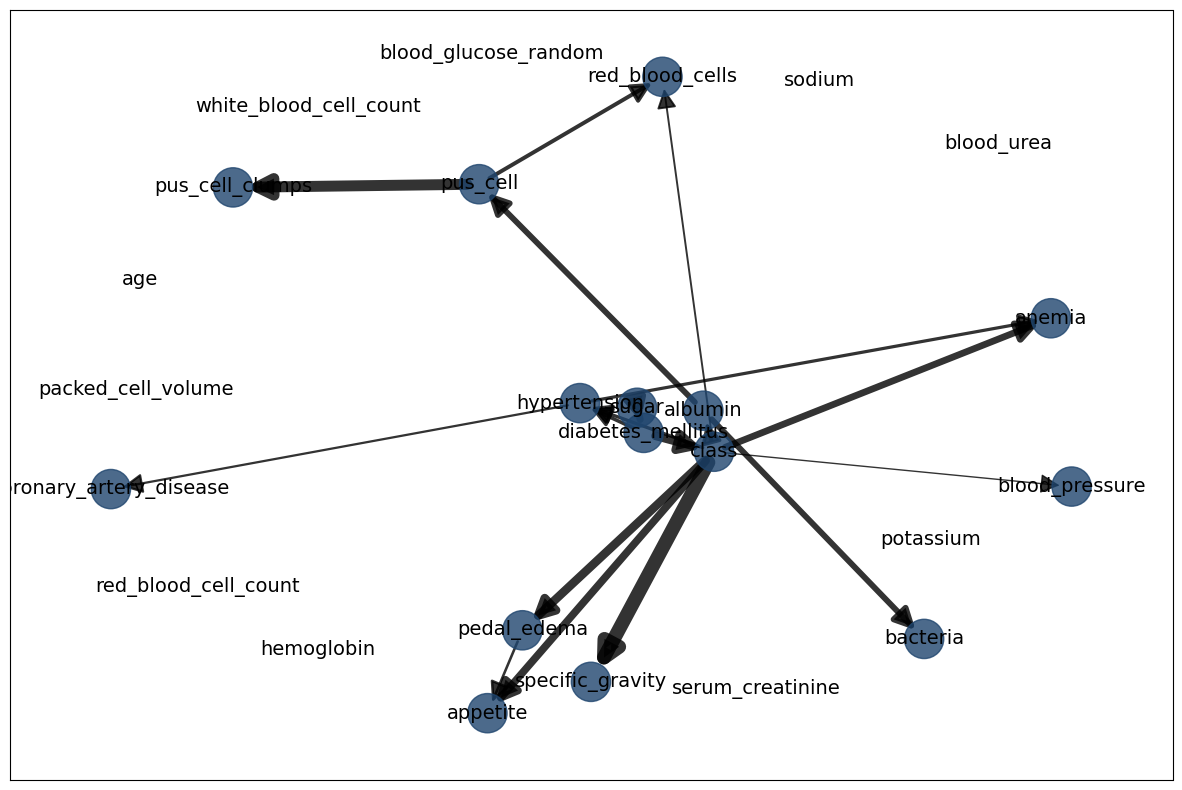

median 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


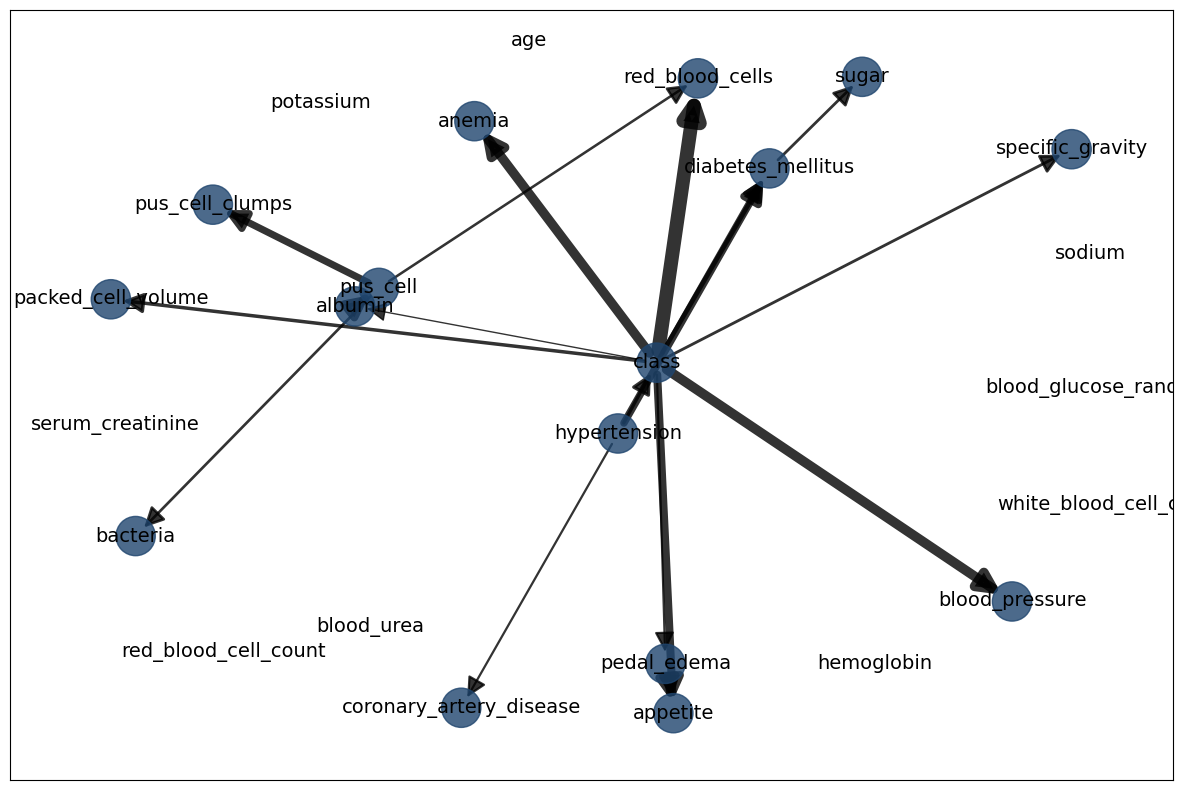

median 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


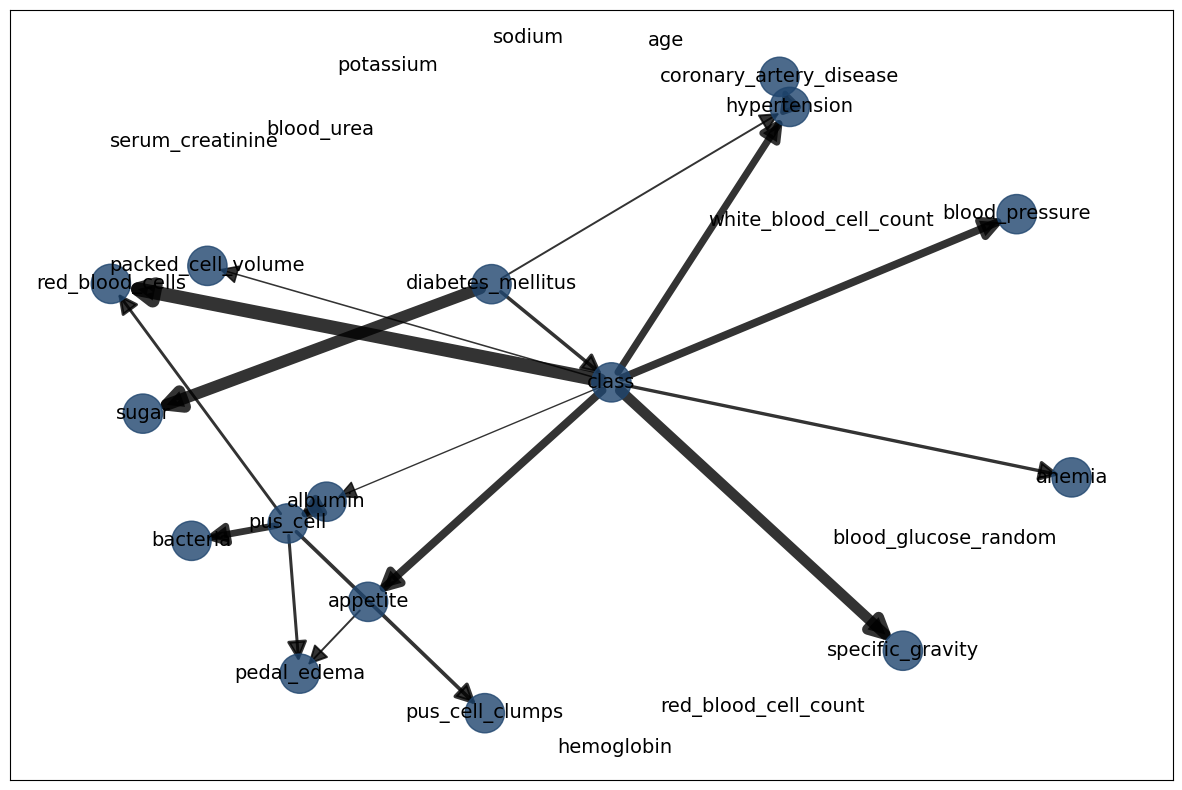

median 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


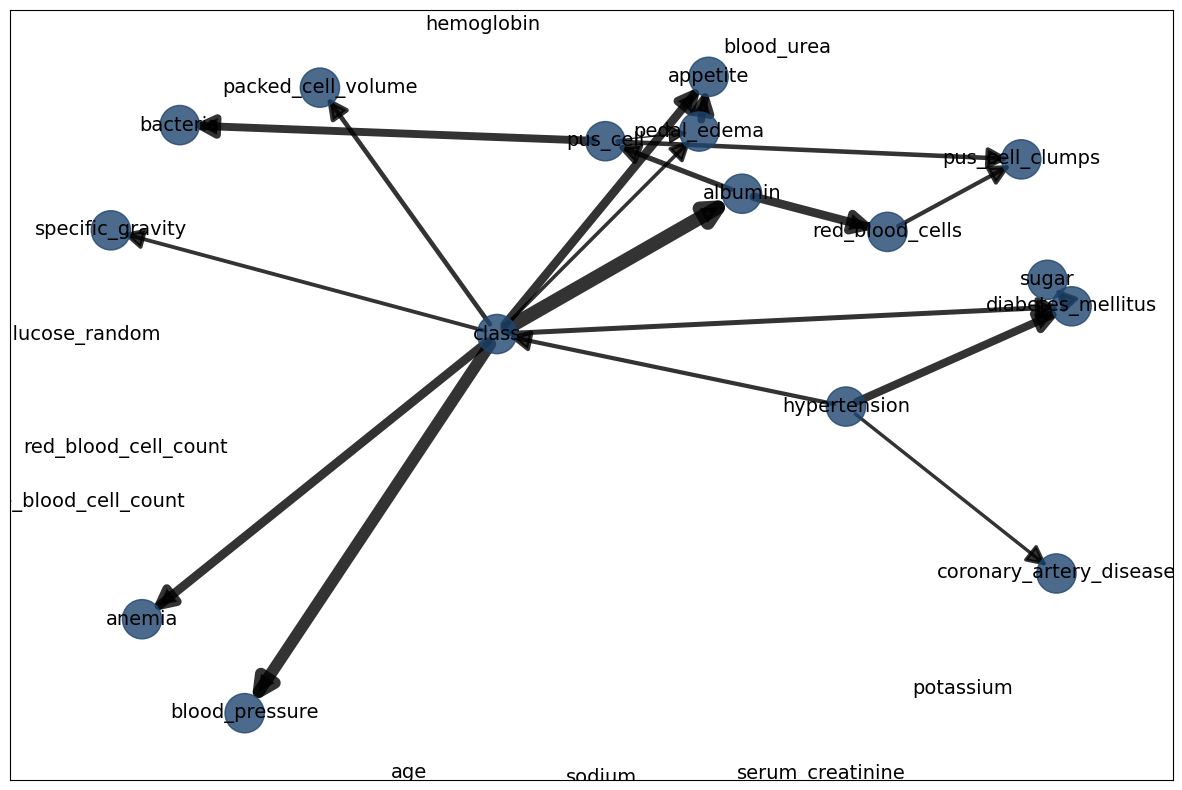

median 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


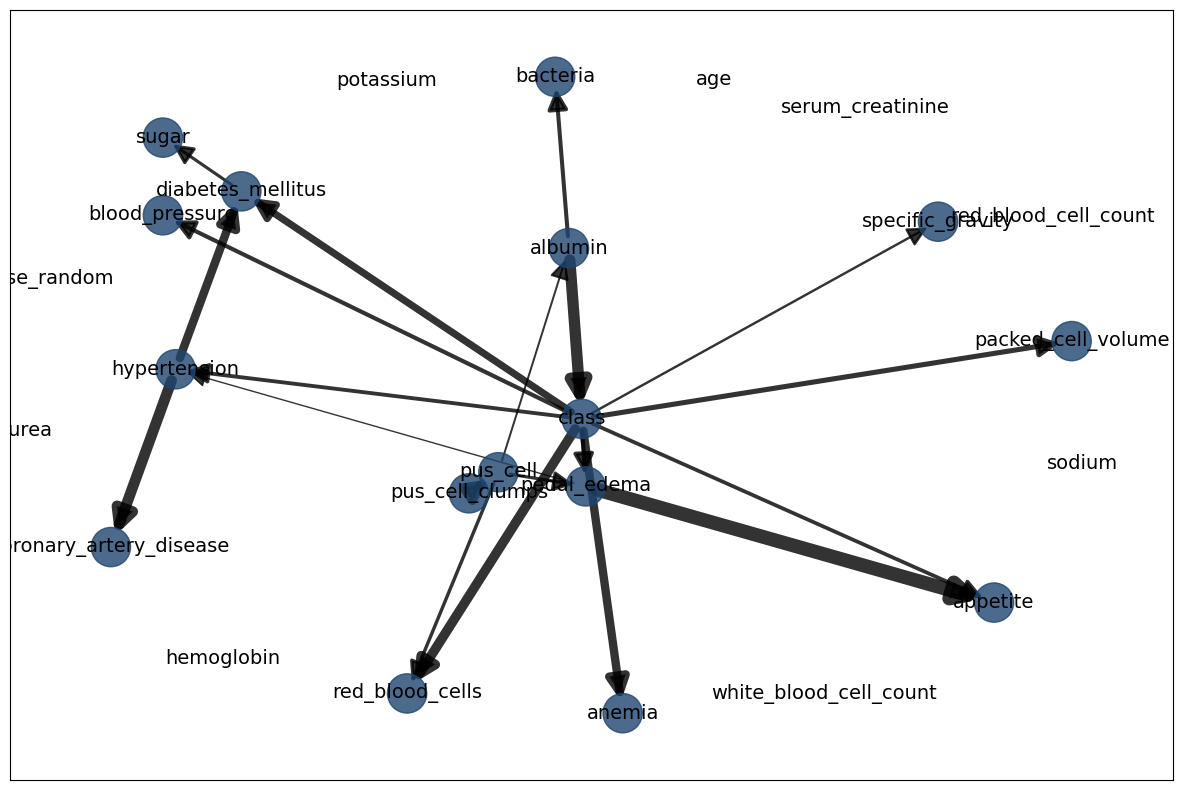

median 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


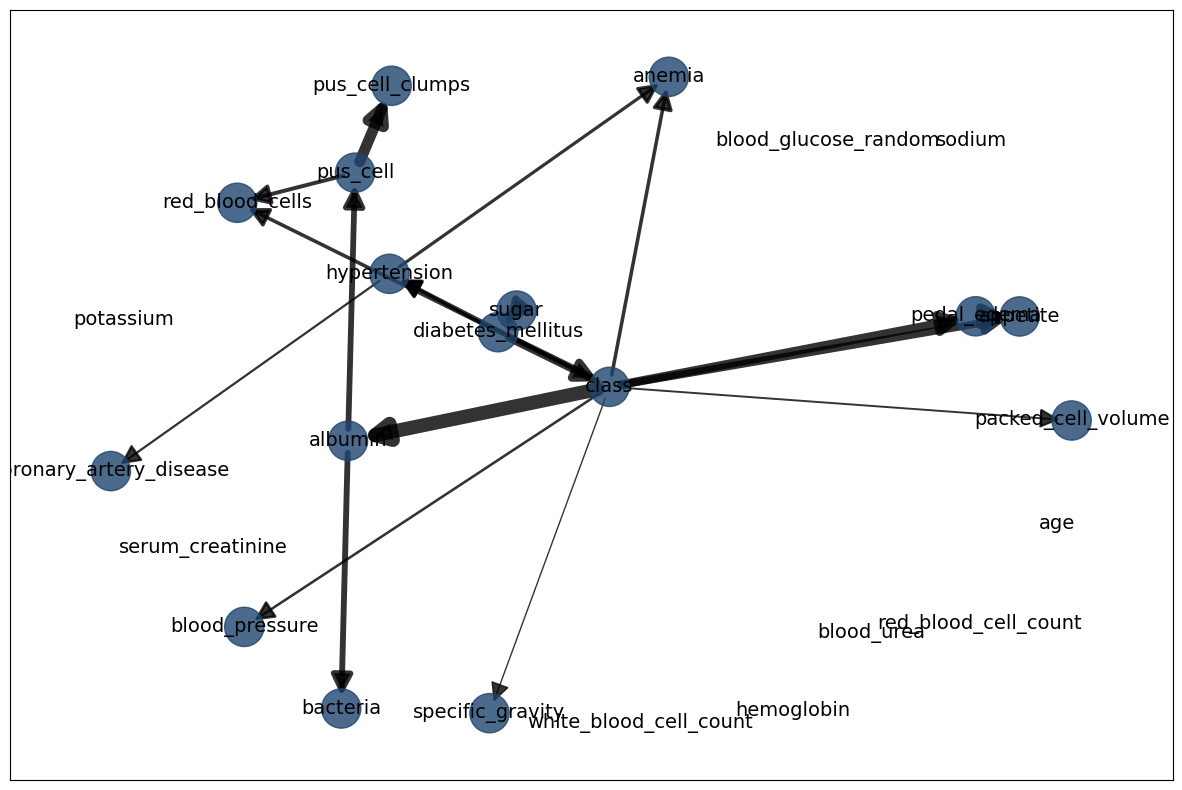

mode 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


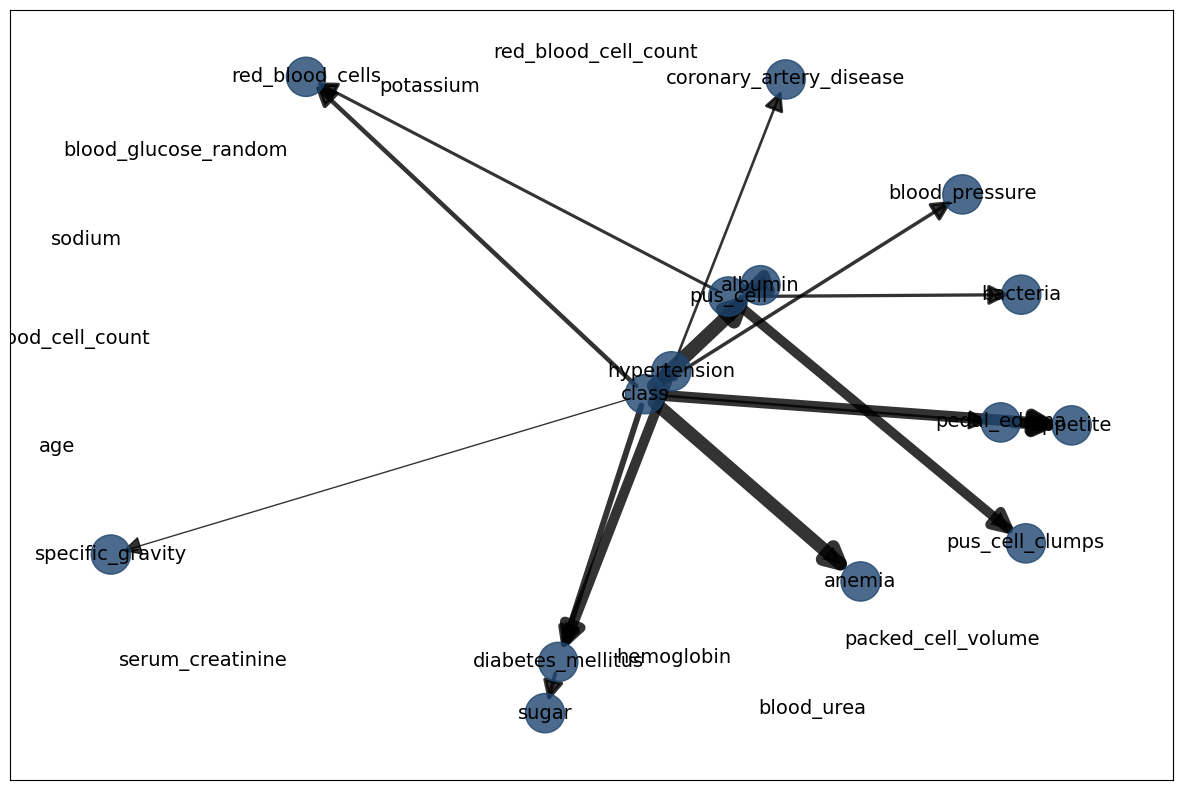

mode 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


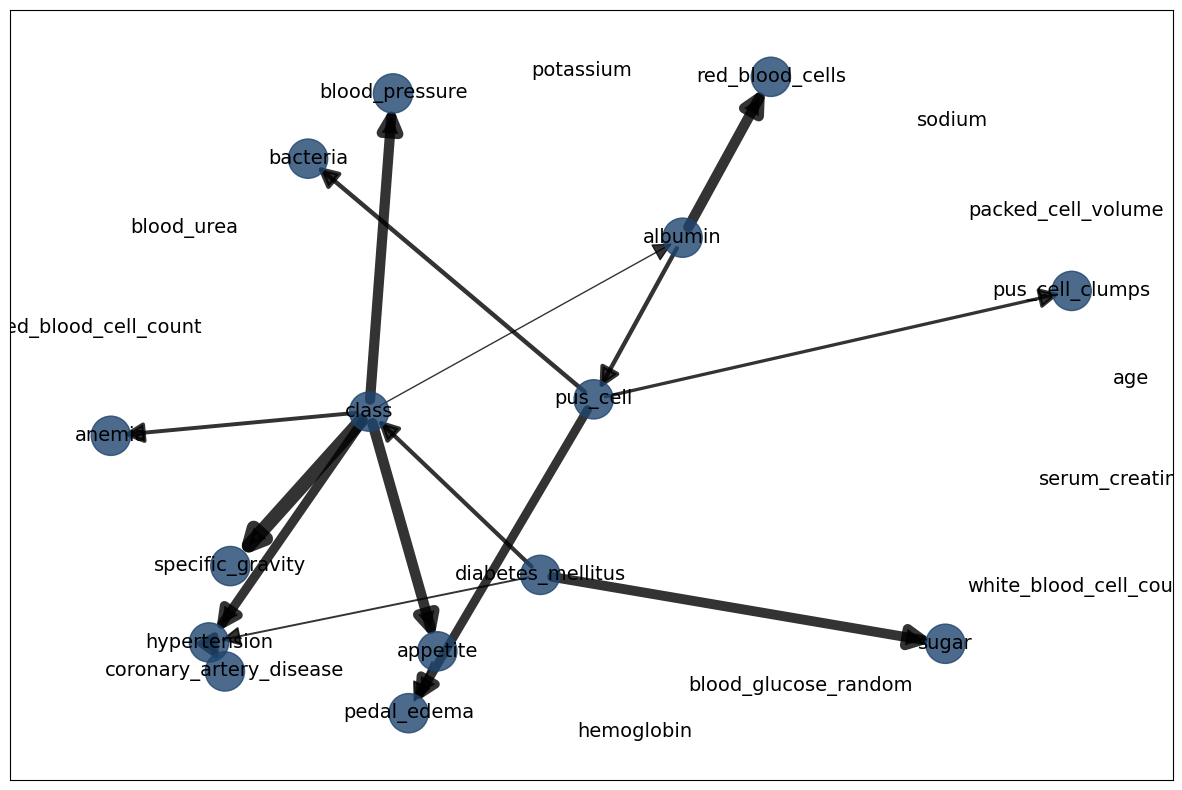

mode 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


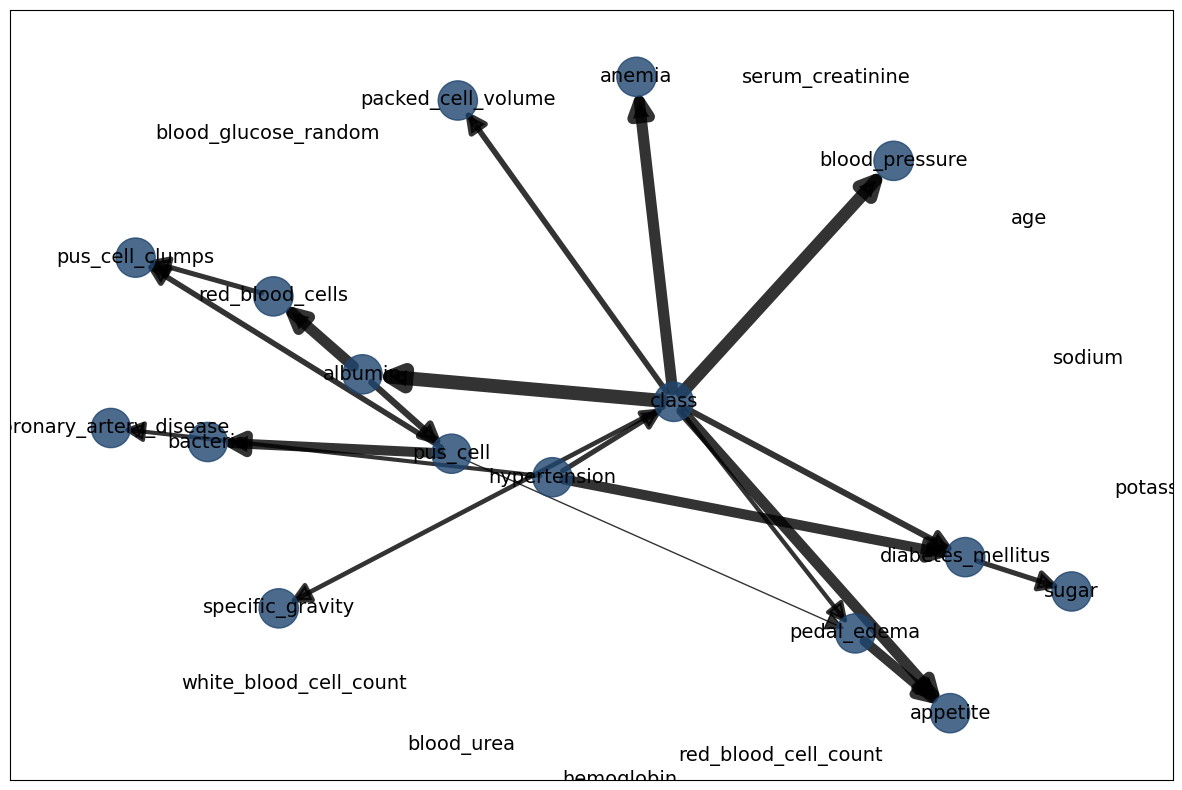

mode 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


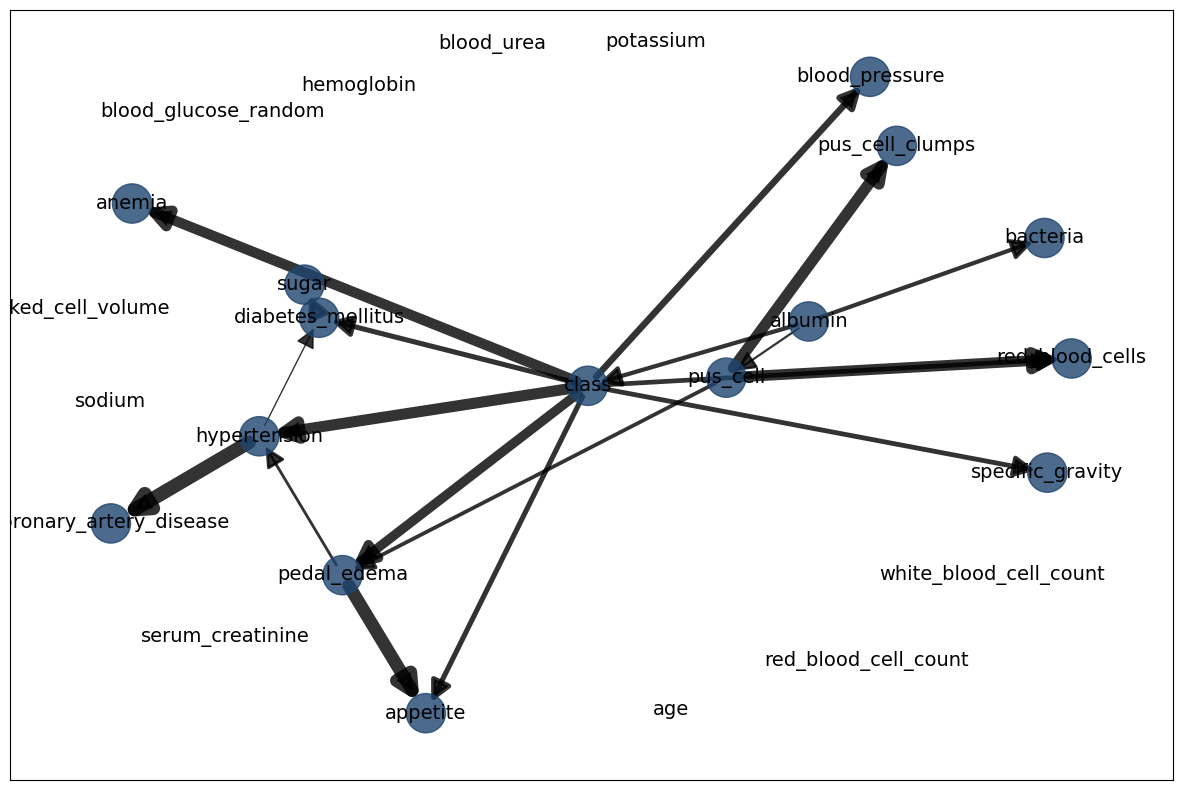

mode 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


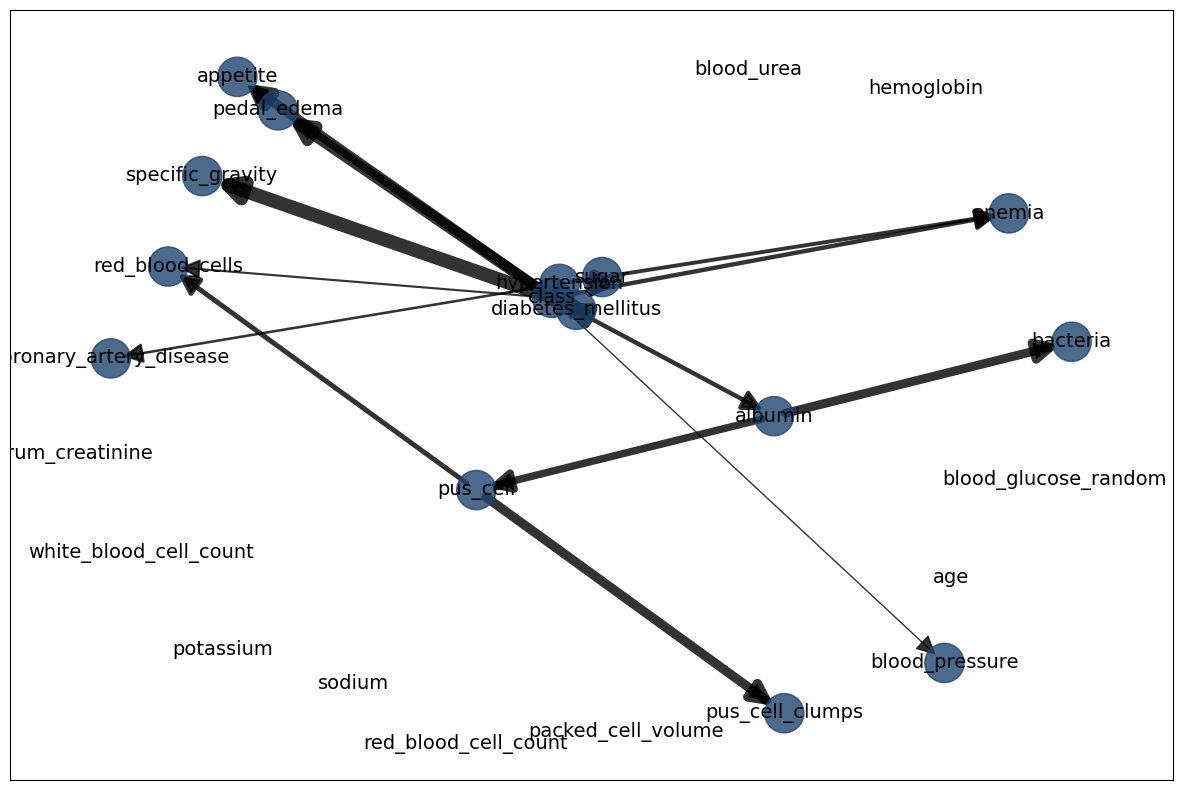

KNN 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


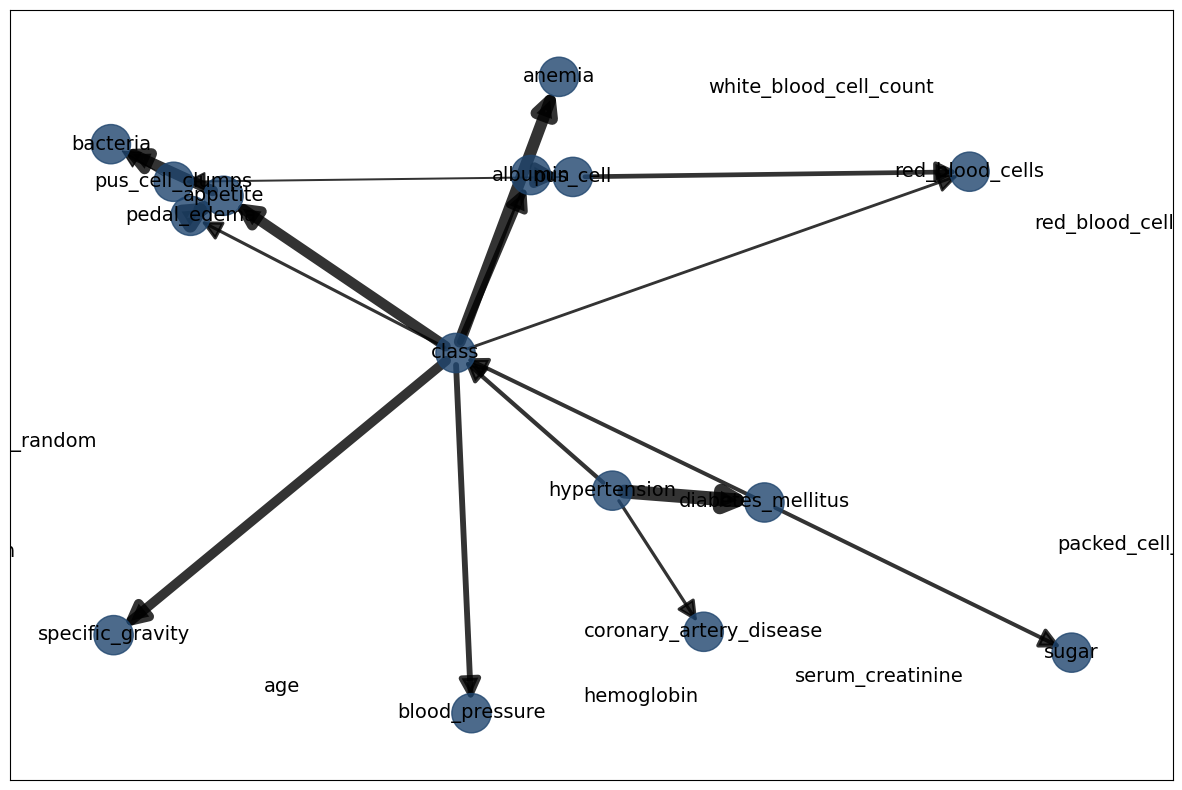

KNN 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


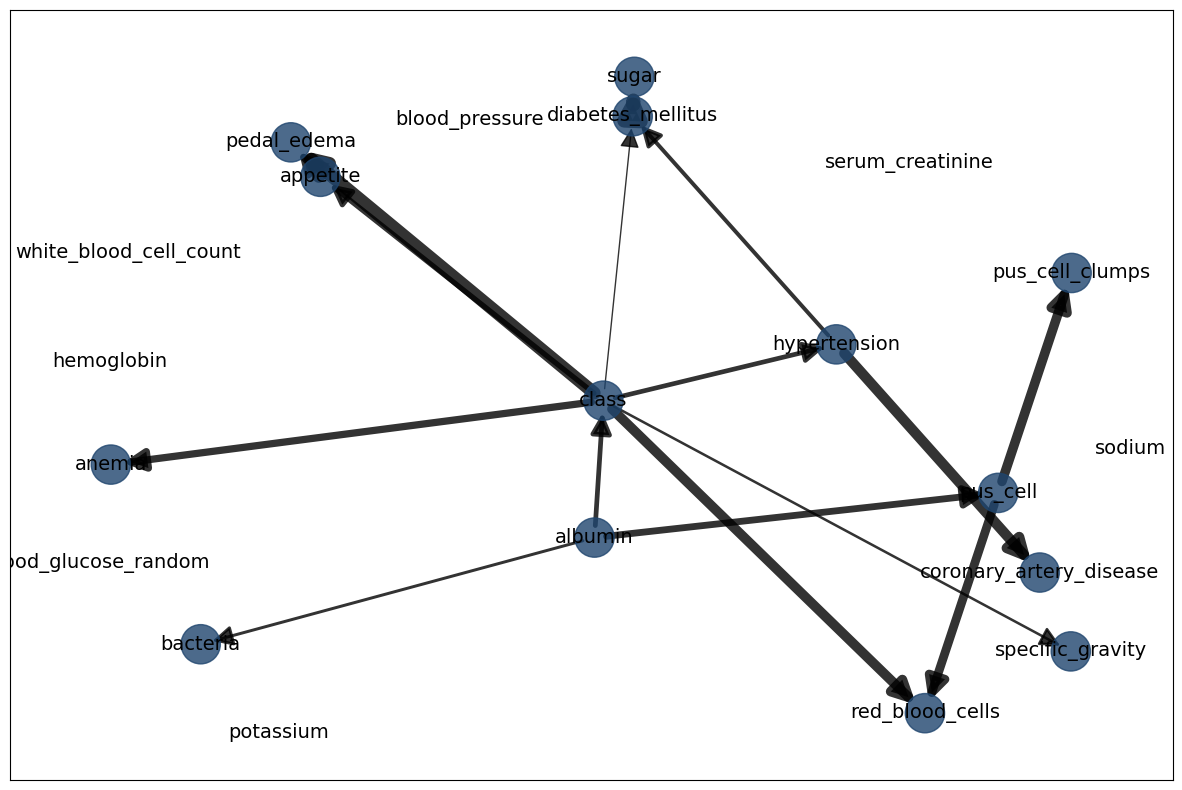

KNN 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


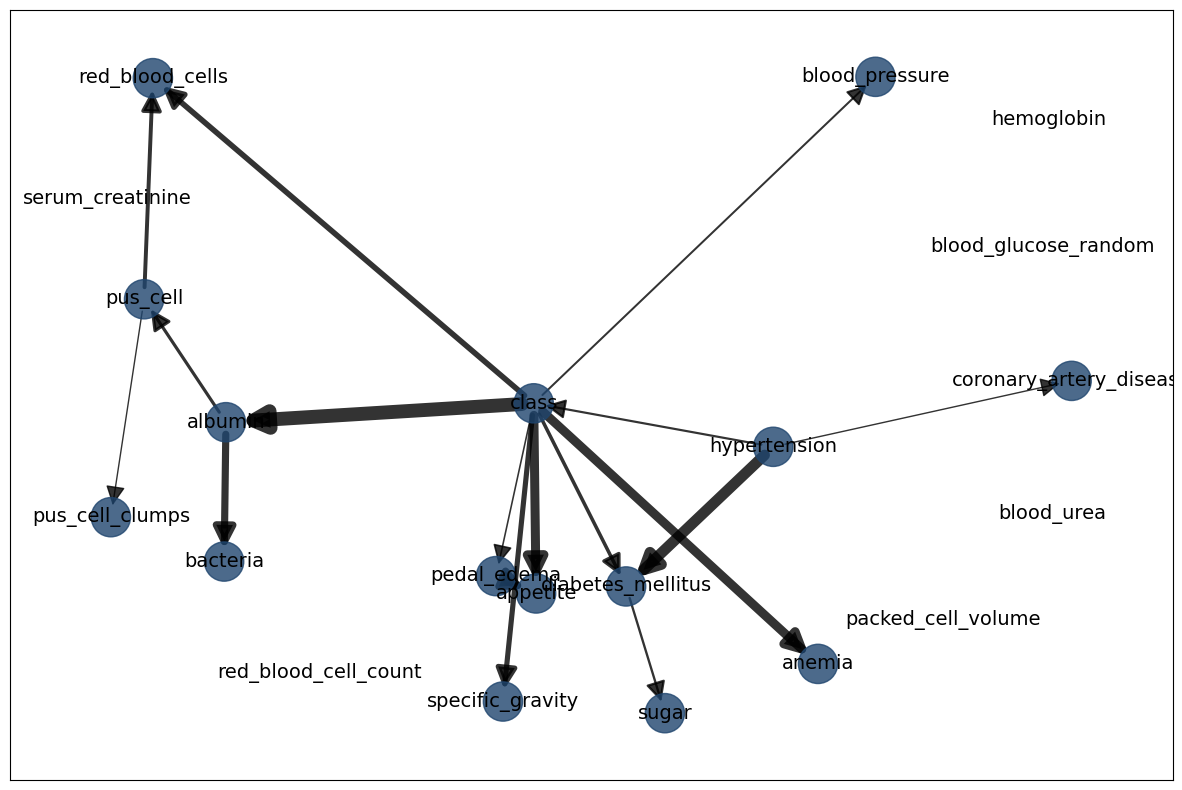

KNN 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


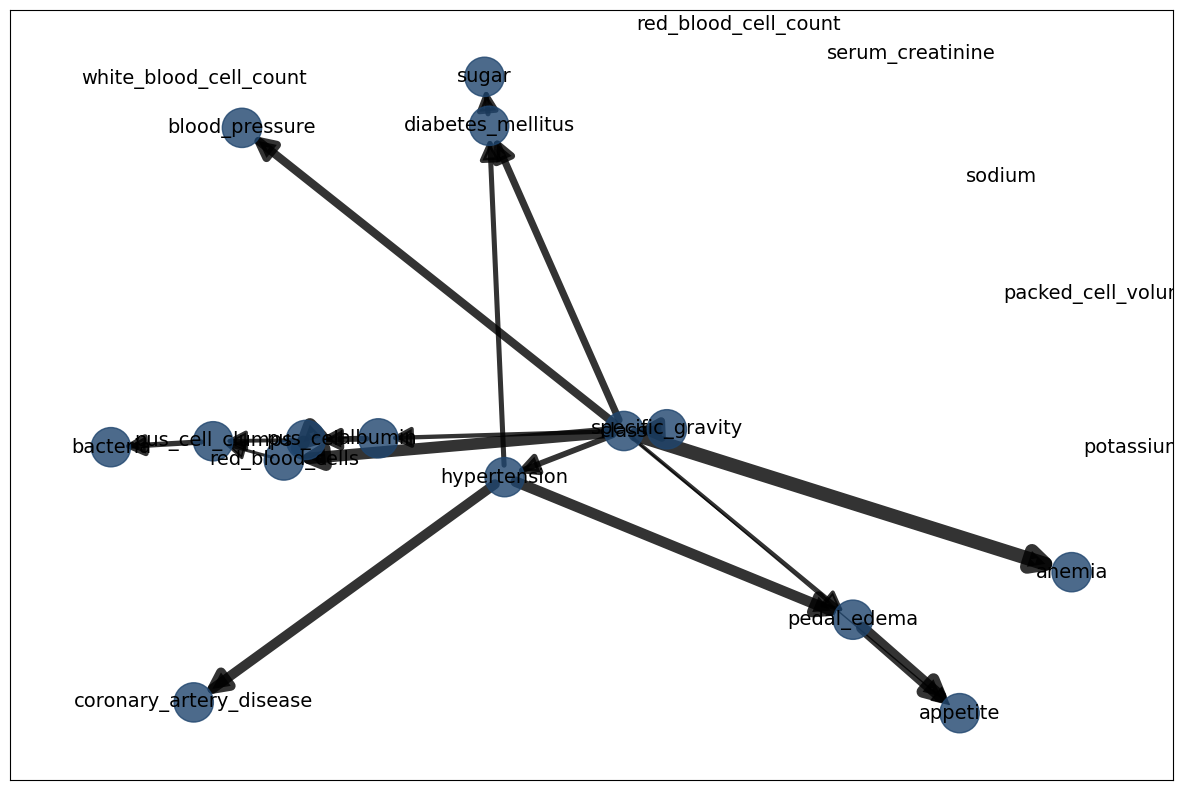

KNN 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


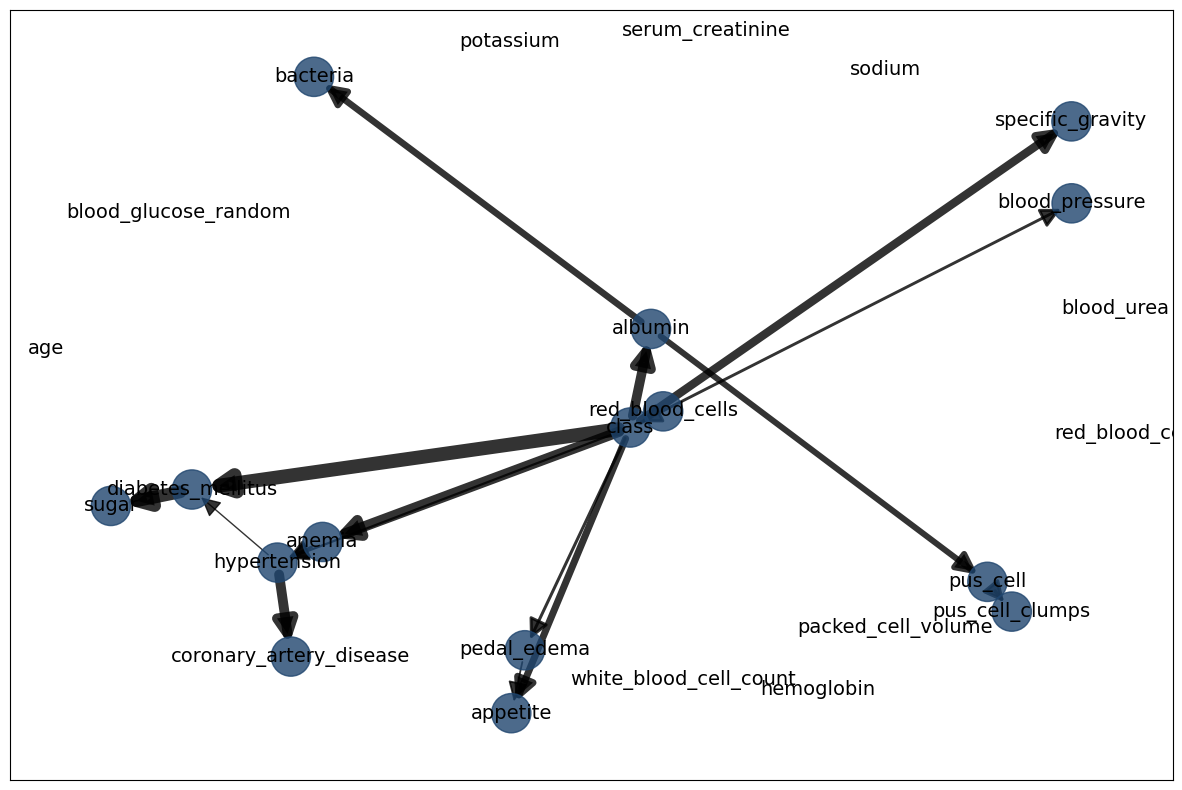

MICE 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


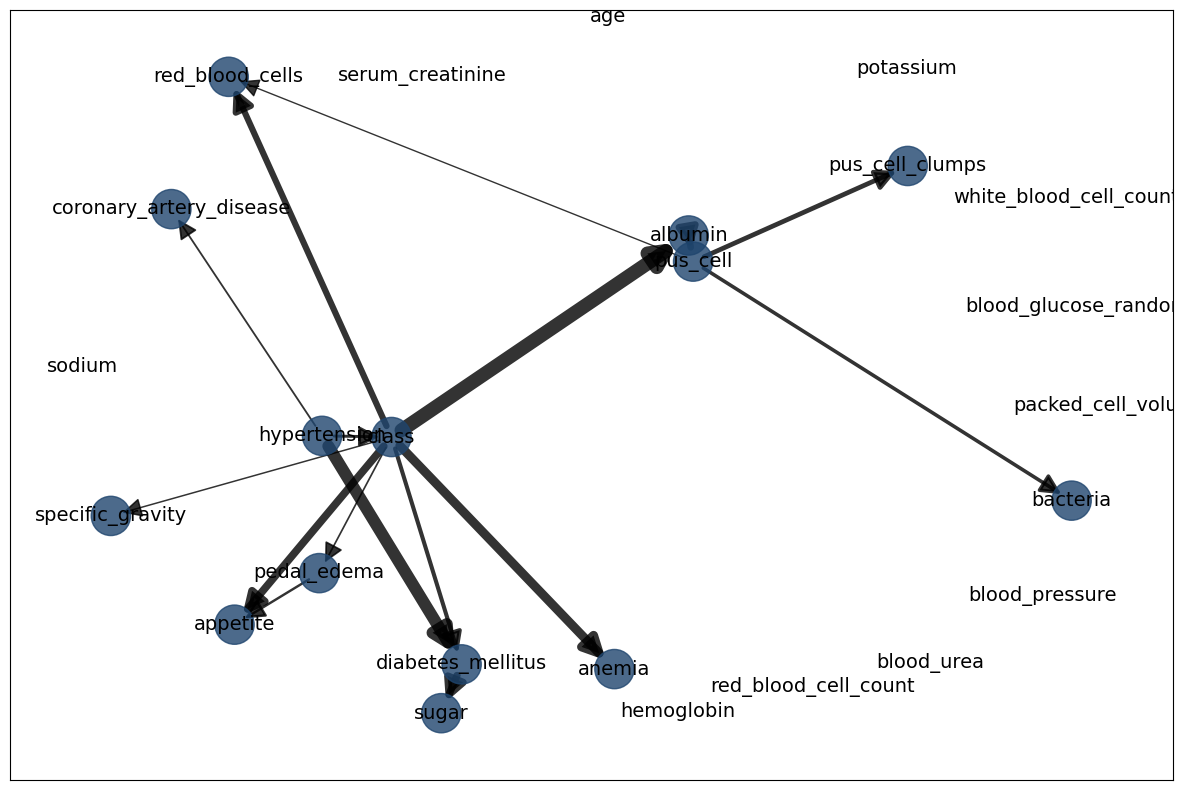

MICE 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


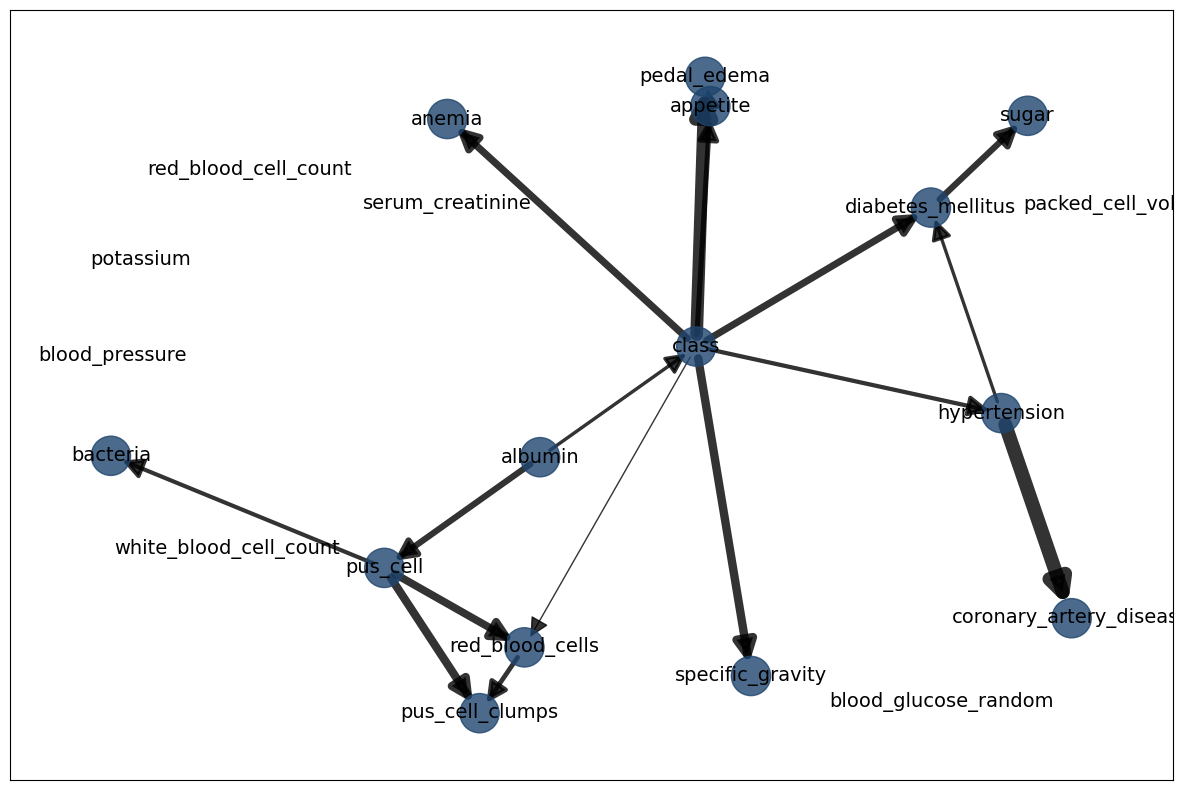

MICE 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


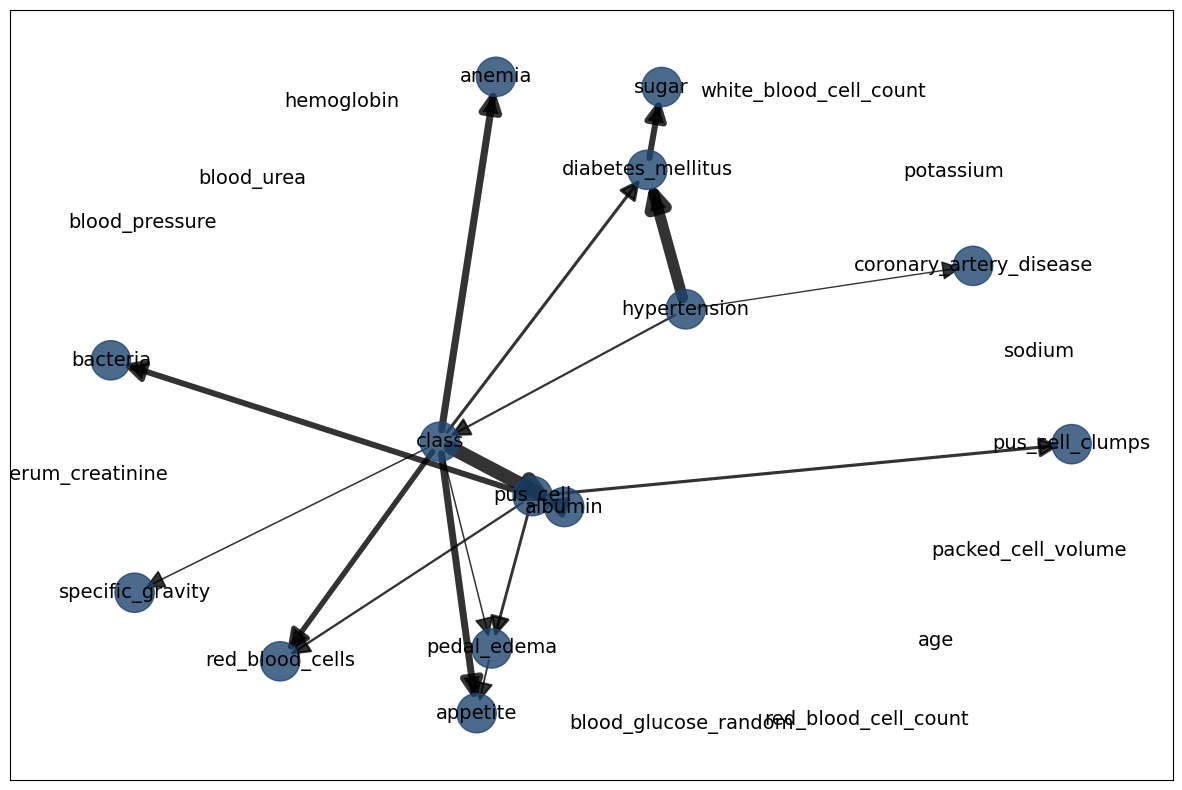

MICE 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


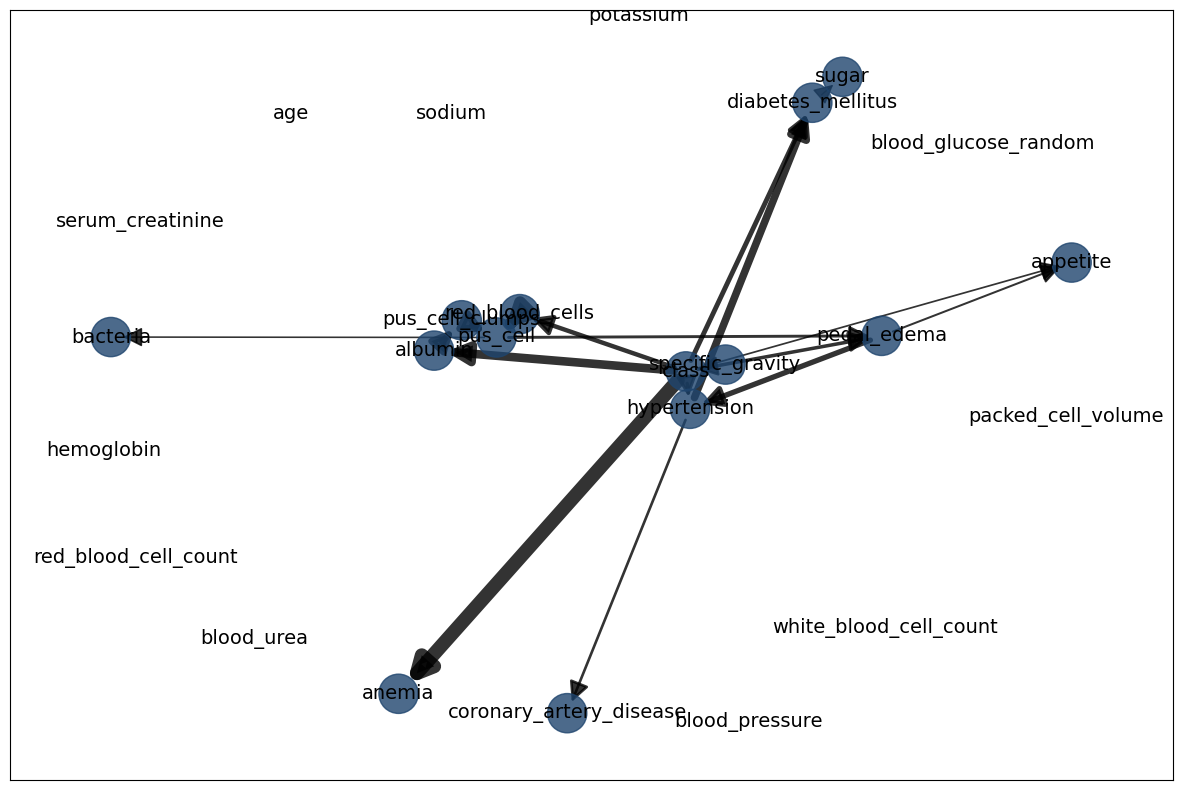

MICE 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


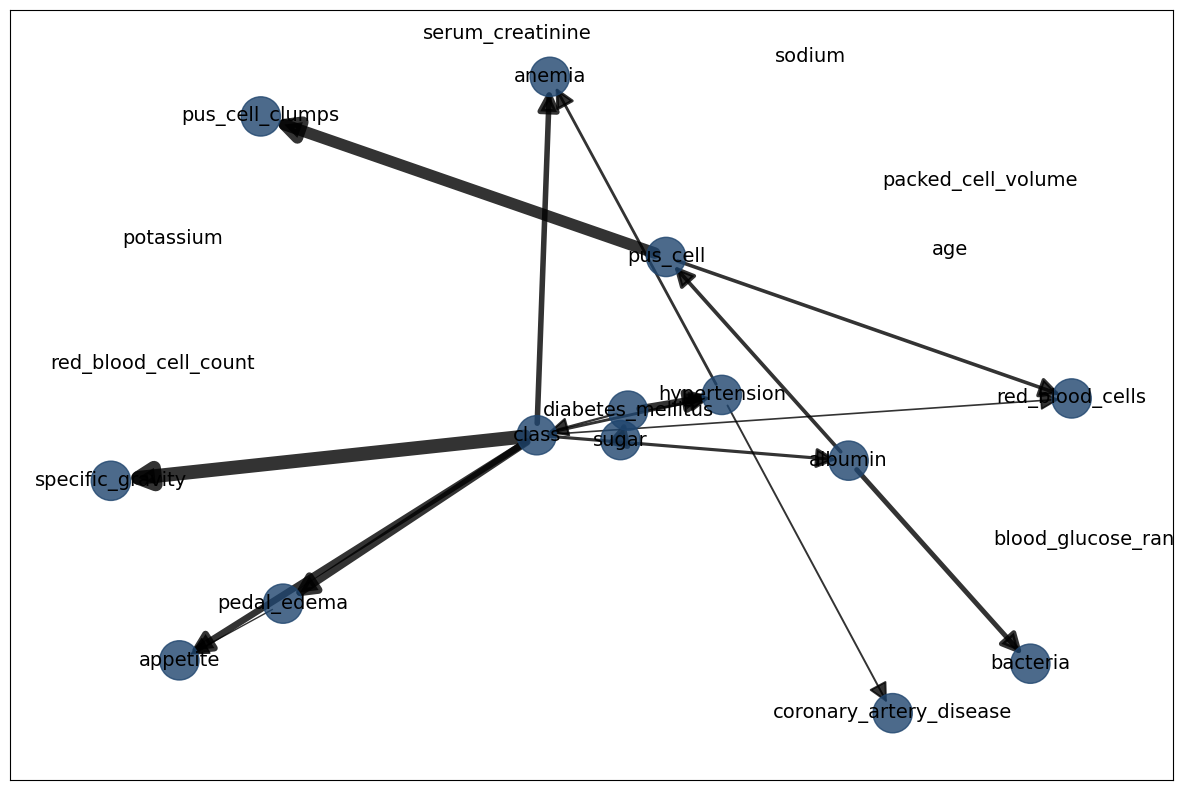

iterative 0
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


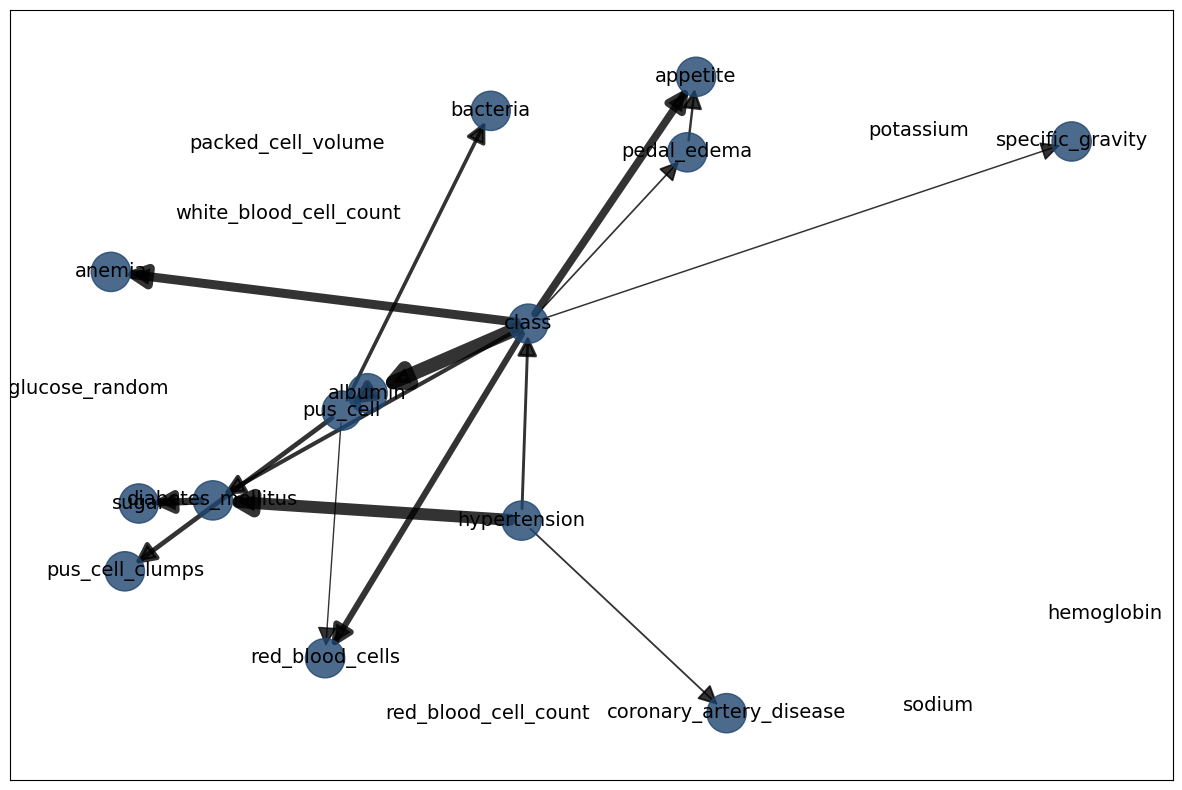

iterative 1
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


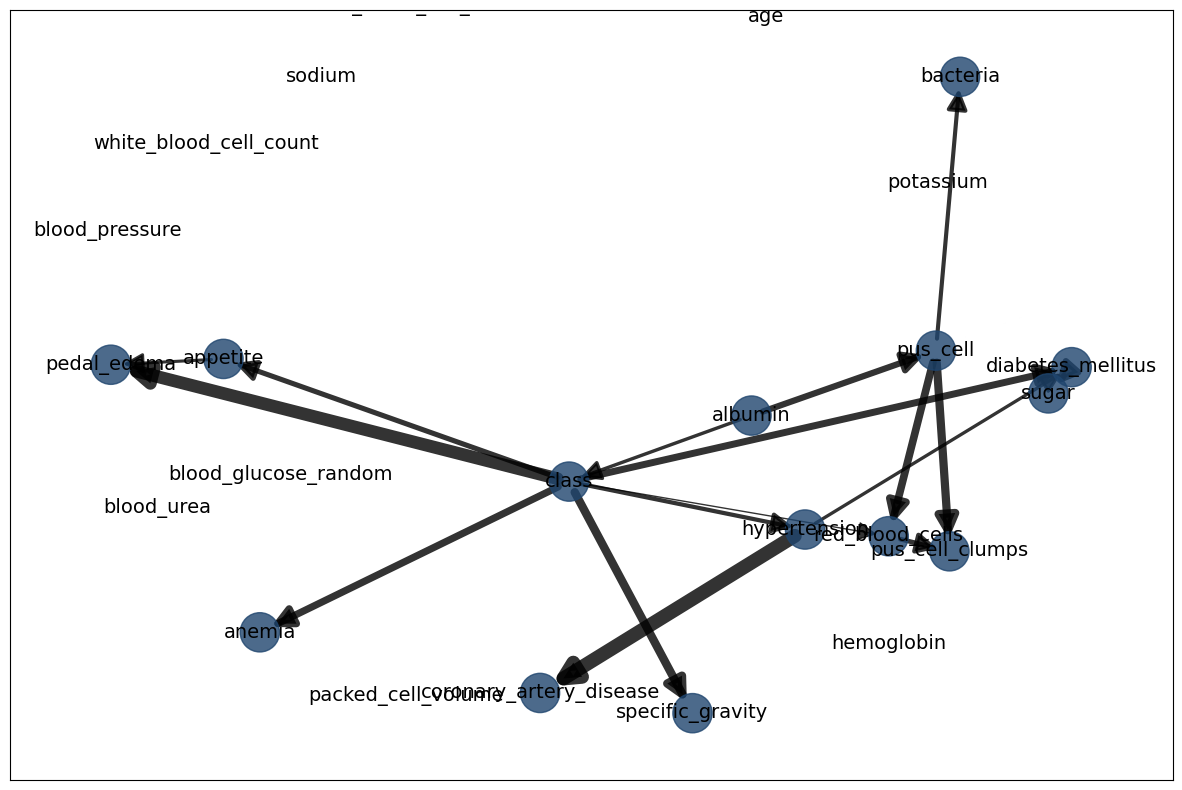

iterative 2
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


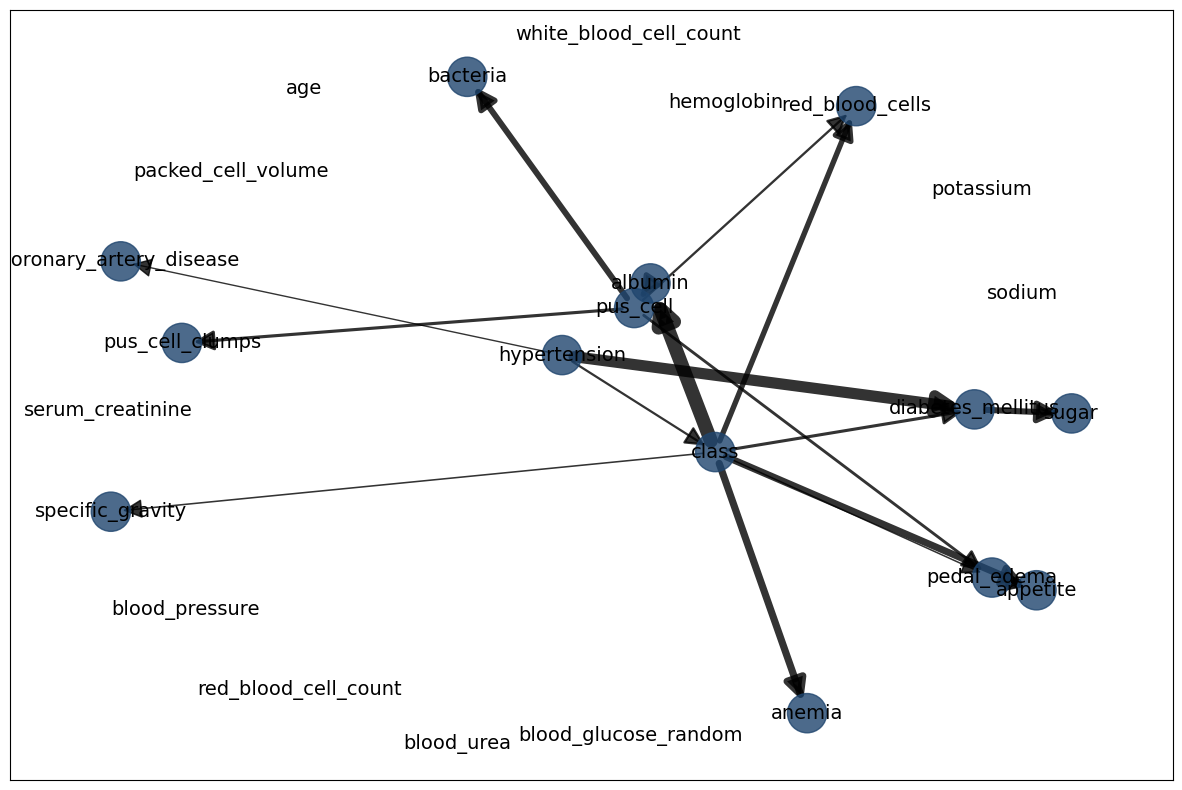

iterative 3
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


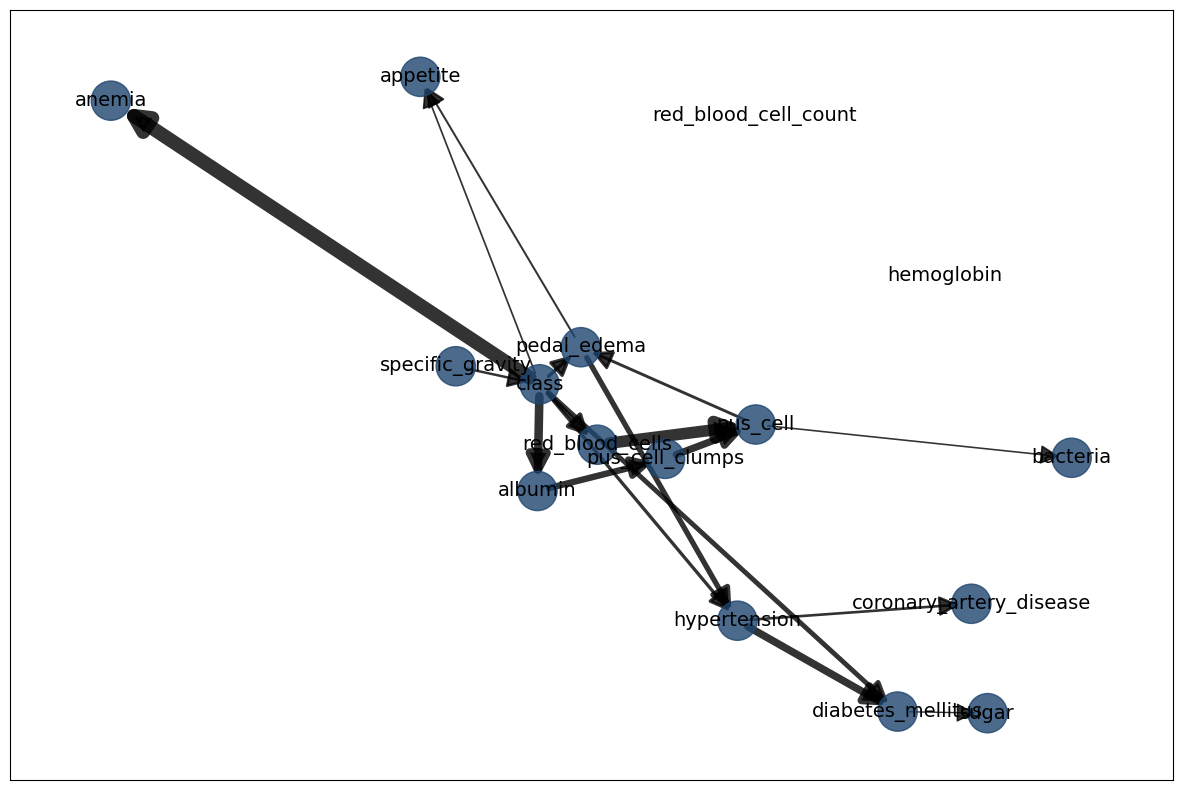

iterative 4
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


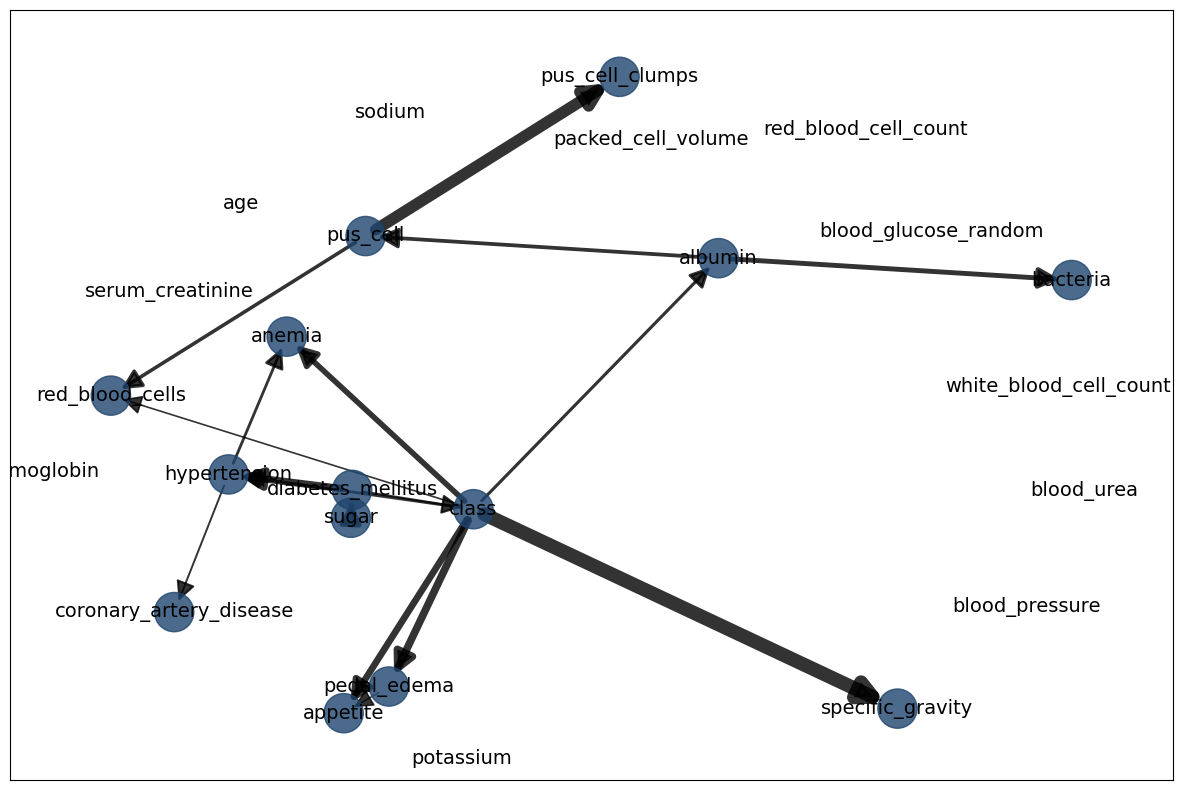

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

for i, (name, models) in enumerate(results['models'].items()):
    for j, model in enumerate(models):
        print(name, j)
        mod = model.model
        G = bn.plot(model.model)